# NBC - Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('./TitanicDataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]

In [5]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
df['Age']=SimpleImputer(strategy='median').fit_transform(df[['Age']])

In [7]:
df['Embarked']=SimpleImputer(strategy='most_frequent').fit_transform(df[['Embarked']])
df['Embarked']=LabelEncoder().fit_transform(df[['Embarked']])

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
X = df.drop('Survived', axis=1)

In [10]:
y = df['Survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
clf = GaussianNB()

In [13]:
clf.fit(X_train,y_train)

GaussianNB()

In [14]:
y_pred = clf.predict(X_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[86, 19],
       [37, 37]], dtype=int64)

In [16]:
accuracy_score(y_test, y_pred)

0.6871508379888268

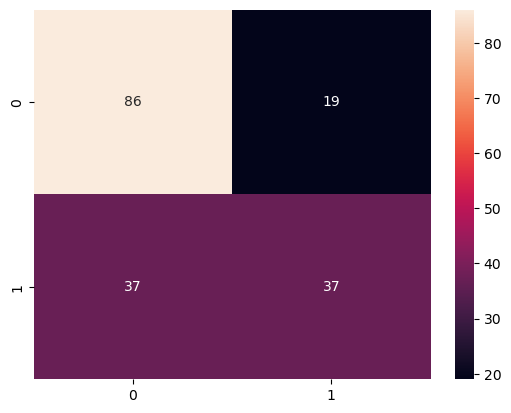

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

<hr>

# KNN - Glass Dataset

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [19]:
df = pd.read_csv('./glass.csv')

In [20]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [22]:
X = df.drop('Type', axis=1)
y = df['Type']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [25]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [26]:
clf = KNeighborsClassifier(n_neighbors=3, metric=euclidean_distance)

In [27]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric=<function euclidean_distance at 0x00000298D3AEAB00>,
                     n_neighbors=3)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.6461538461538462

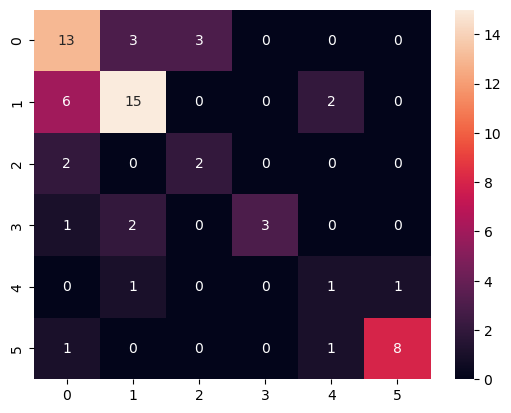

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [31]:
clf = KNeighborsClassifier(n_neighbors=3, metric=manhattan_distance)

In [32]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric=<function manhattan_distance at 0x00000298D3AEA200>,
                     n_neighbors=3)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred)

0.6461538461538462

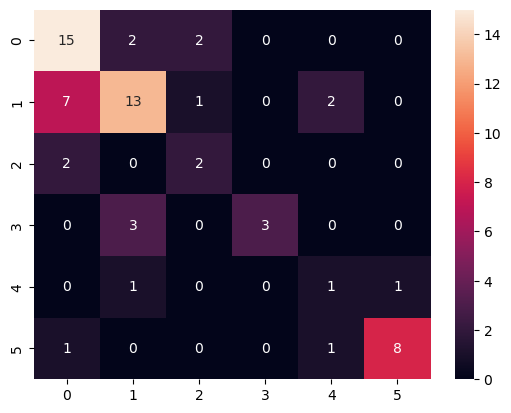

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

<hr>

# Decision Tree - Weather Data

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [37]:
df = pd.read_csv('weather.csv')
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [38]:
encoder = OneHotEncoder(drop='first')
X = encoder.fit_transform(df.drop('Play', axis=1)).toarray()
y = df['Play']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
def dt(criterion):
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    plot_tree(clf, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
    plt.show()
    y_pred = clf.predict(X_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Classification Report:\n",classification_report(y_test, y_pred))
    cv_scores = cross_val_score(clf, X, y, cv=5)
    print("Cross-Validation Scores :\n", cv_scores)
    print("Mean CV Accuracy :", cv_scores.mean())

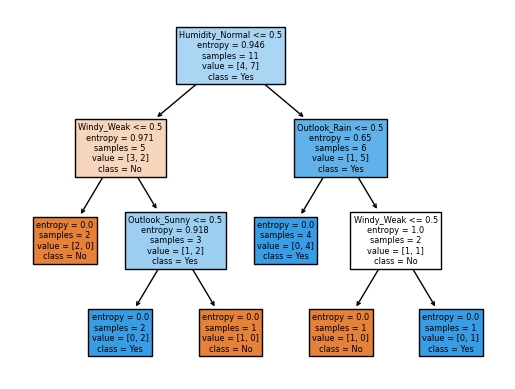

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores :
 [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy : 0.7333333333333333


In [40]:
dt('entropy')

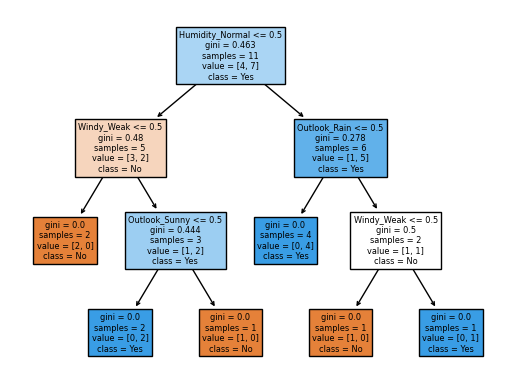

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores :
 [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy : 0.7333333333333333


In [41]:
dt('gini')

<hr>

# KMeans - Iris Dataset

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [43]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
# or
# df = pd.read_csv('./iris.csv')
# X = np.array(df.iloc[:,1:-1].values)

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
def kmeans(X, K, max_iters):
    centroids = X[:K]
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis]-centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels==k].mean(axis=0) for k in range(K)])
        if np.all(new_centroids==centroids):
            break
        centroids=new_centroids
    return labels, centroids

In [46]:
labels, c = kmeans(X, 3, 20)

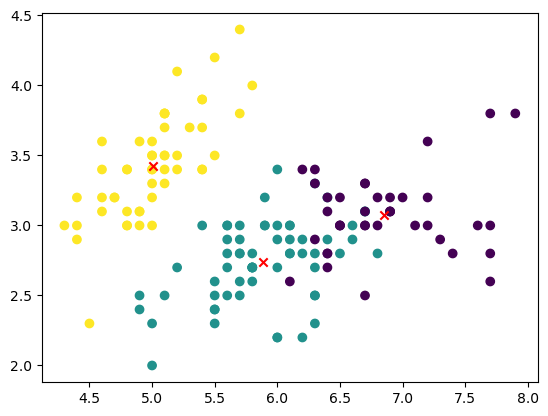

In [47]:
plt.scatter(X[:, 0], X[:,1],c=labels)
plt.scatter(c[:,0], c[:,1], marker='x', color='red')
plt.show()

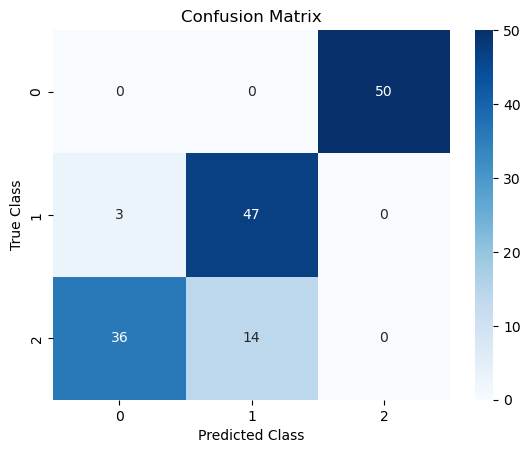

In [48]:
sns.heatmap(confusion_matrix(y, labels), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

<hr>

# Agglomerative Clustering

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

In [50]:
data=load_iris().data[:6]

In [51]:
def proximity_matrix(data):
    n = data.shape[0]
    mat = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            mat[i,j] = np.linalg.norm(data[i]-data[j])
            mat[j,i]=mat[i,j]
    return mat
proximity_matrix(X)

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

In [52]:
def plot_dendrogram(data, method):
    mat = linkage(data, method=method)
    dendrogram(mat)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

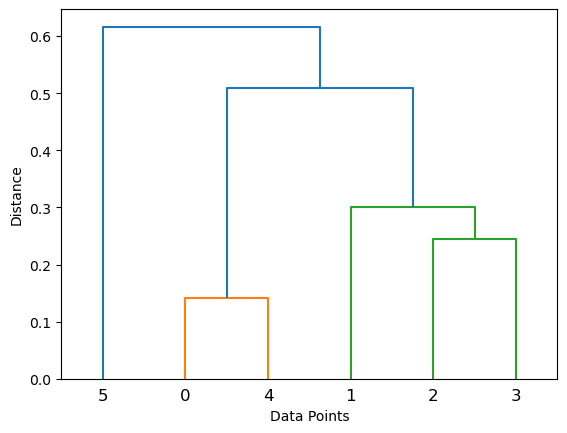

In [53]:
plot_dendrogram(data,'single')

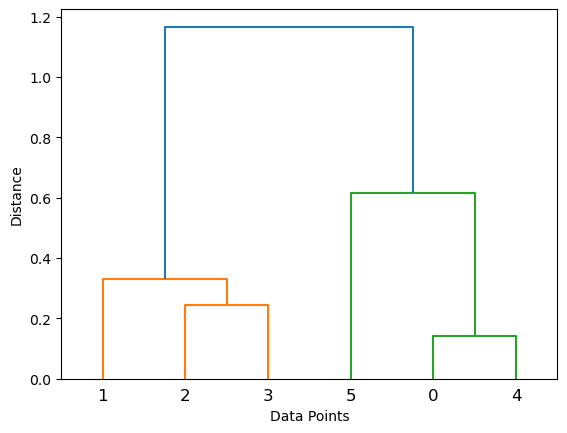

In [54]:
plot_dendrogram(data,'complete')

<hr>

# PCA

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 

In [56]:
X = load_iris().data

In [57]:
y=load_iris().target

In [58]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

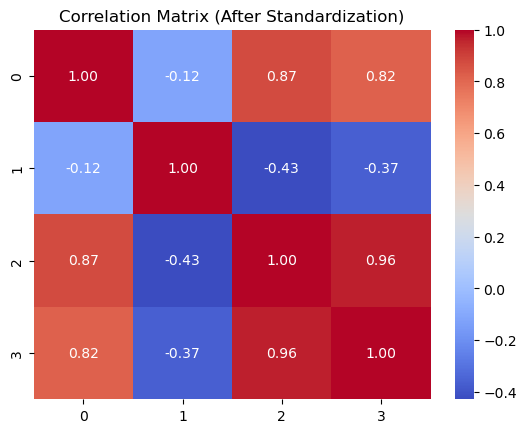

In [59]:
sns.heatmap(np.corrcoef(X.T), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (After Standardization)')
plt.show()

In [60]:
pca = PCA(n_components=2)

In [61]:
x_proj = pca.fit_transform(X)

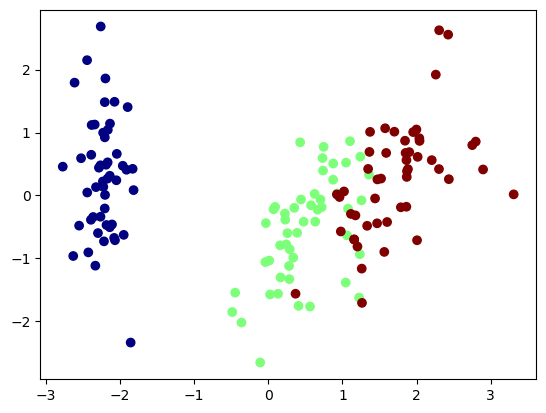

In [62]:
pc1 = x_proj[:,0]
pc2 = x_proj[:,1]
plt.scatter(pc1, pc2, c=y, cmap='jet')

# LDA

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [64]:
X = load_iris().data

In [65]:
y = load_iris().target

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

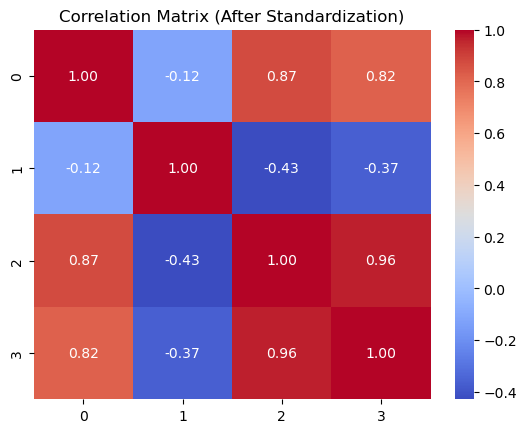

In [67]:
sns.heatmap(np.corrcoef(X.T), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (After Standardization)')
plt.show()

In [68]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [69]:
x_proj = lda.fit_transform(X,y)

In [70]:
ld1 = x_proj[:,0]
ld2 = x_proj[:,1]

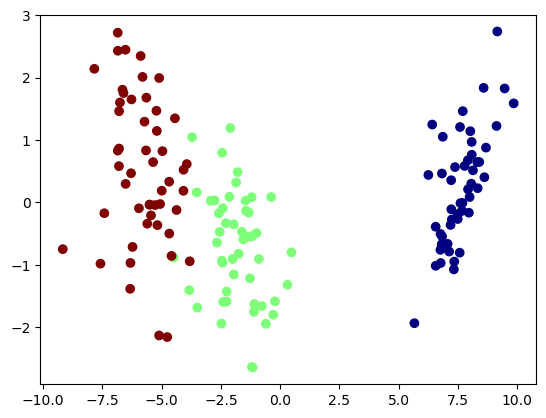

In [71]:
plt.scatter(ld1, ld2,c=y, cmap='jet')
plt.show()

<hr>

# SLP

In [72]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [73]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

In [74]:
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

In [75]:
def create_and_train_model(inputs, labels, epochs=5000):
    model = Sequential([Dense(1, input_dim=2, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(inputs, labels, epochs=epochs)
    return model

In [76]:
model_and = create_and_train_model(X_and, y_and)
model_or = create_and_train_model(X_or, y_or)

Epoch 1/5000
1/1 [==============================] - 0s 298ms/step - loss: 0.7491 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.7488 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7485 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7482 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7479 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7476 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7473 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7470 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7467 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7464 - accuracy: 0.5000
Epoch 11/5000
1/

1/1 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.5000
Epoch 84/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.5000
Epoch 85/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7241 - accuracy: 0.5000
Epoch 86/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.5000
Epoch 87/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7235 - accuracy: 0.5000
Epoch 88/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.5000
Epoch 89/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.5000
Epoch 90/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7226 - accuracy: 0.5000
Epoch 91/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7223 - accuracy: 0.5000
Epoch 92/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7220 - accuracy: 0.5000
Epoch 93/5000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5000
Epoch 166/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.5000
Epoch 167/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7007 - accuracy: 0.5000
Epoch 168/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 169/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 170/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 171/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.5000
Epoch 172/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 173/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 174/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5000
Epoch 175/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5000
Epoch 248/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.5000
Epoch 249/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5000
Epoch 250/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5000
Epoch 251/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5000
Epoch 252/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5000
Epoch 253/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5000
Epoch 254/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.5000
Epoch 255/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5000
Epoch 256/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5000
Epoch 257/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.5000
Epoch 330/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.5000
Epoch 331/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6571 - accuracy: 0.5000
Epoch 332/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.5000
Epoch 333/5000
1/1 [==============================] - 0s 865us/step - loss: 0.6566 - accuracy: 0.5000
Epoch 334/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.5000
Epoch 335/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.5000
Epoch 336/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.5000
Epoch 337/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.5000
Epoch 338/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.5000
Epoch 339/500

1/1 [==============================] - 0s 0s/step - loss: 0.6373 - accuracy: 0.5000
Epoch 412/5000
1/1 [==============================] - 0s 726us/step - loss: 0.6371 - accuracy: 0.5000
Epoch 413/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6368 - accuracy: 0.5000
Epoch 414/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6366 - accuracy: 0.5000
Epoch 415/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6363 - accuracy: 0.5000
Epoch 416/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6361 - accuracy: 0.5000
Epoch 417/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6359 - accuracy: 0.5000
Epoch 418/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.5000
Epoch 419/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6354 - accuracy: 0.5000
Epoch 420/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6351 - accuracy: 0.5000
Epoch 421/5000
1/1

1/1 [==============================] - 0s 7ms/step - loss: 0.6179 - accuracy: 0.5000
Epoch 494/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6177 - accuracy: 0.5000
Epoch 495/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.5000
Epoch 496/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6172 - accuracy: 0.5000
Epoch 497/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6170 - accuracy: 0.5000
Epoch 498/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.5000
Epoch 499/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6165 - accuracy: 0.5000
Epoch 500/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.5000
Epoch 501/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.5000
Epoch 502/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.5000
Epoch 503/5000
1/

1/1 [==============================] - 0s 604us/step - loss: 0.5994 - accuracy: 0.7500
Epoch 576/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5991 - accuracy: 0.7500
Epoch 577/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5989 - accuracy: 0.7500
Epoch 578/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.7500
Epoch 579/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5985 - accuracy: 0.7500
Epoch 580/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5982 - accuracy: 0.7500
Epoch 581/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.7500
Epoch 582/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5978 - accuracy: 0.7500
Epoch 583/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5976 - accuracy: 0.7500
Epoch 584/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.7500
Epoch 585/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7500
Epoch 658/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7500
Epoch 659/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.7500
Epoch 660/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5810 - accuracy: 0.7500
Epoch 661/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5808 - accuracy: 0.7500
Epoch 662/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5806 - accuracy: 0.7500
Epoch 663/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.7500
Epoch 664/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5802 - accuracy: 0.7500
Epoch 665/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5800 - accuracy: 0.7500
Epoch 666/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7500
Epoch 667/5000
1

1/1 [==============================] - 0s 7ms/step - loss: 0.5647 - accuracy: 0.7500
Epoch 740/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5645 - accuracy: 0.7500
Epoch 741/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5643 - accuracy: 0.7500
Epoch 742/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.7500
Epoch 743/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 744/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.7500
Epoch 745/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 746/5000
1/1 [==============================] - 0s 946us/step - loss: 0.5633 - accuracy: 0.7500
Epoch 747/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 748/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 749/5000


1/1 [==============================] - 0s 930us/step - loss: 0.5485 - accuracy: 0.7500
Epoch 822/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5483 - accuracy: 0.7500
Epoch 823/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5481 - accuracy: 0.7500
Epoch 824/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5479 - accuracy: 0.7500
Epoch 825/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5478 - accuracy: 0.7500
Epoch 826/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7500
Epoch 827/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7500
Epoch 828/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5472 - accuracy: 0.7500
Epoch 829/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7500
Epoch 830/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.7500
Epoch 831/5000

1/1 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.7500
Epoch 904/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7500
Epoch 905/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.7500
Epoch 906/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5325 - accuracy: 0.7500
Epoch 907/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.7500
Epoch 908/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7500
Epoch 909/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7500
Epoch 910/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7500
Epoch 911/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7500
Epoch 912/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7500
Epoch 913/5000


1/1 [==============================] - 0s 7ms/step - loss: 0.5182 - accuracy: 0.7500
Epoch 986/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5180 - accuracy: 0.7500
Epoch 987/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5179 - accuracy: 0.7500
Epoch 988/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5177 - accuracy: 0.7500
Epoch 989/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5175 - accuracy: 0.7500
Epoch 990/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5173 - accuracy: 0.7500
Epoch 991/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5172 - accuracy: 0.7500
Epoch 992/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5170 - accuracy: 0.7500
Epoch 993/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5168 - accuracy: 0.7500
Epoch 994/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7500
Epoch 995/5000
1/

1/1 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7500
Epoch 1067/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7500
Epoch 1068/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.7500
Epoch 1069/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5037 - accuracy: 0.7500
Epoch 1070/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5035 - accuracy: 0.7500
Epoch 1071/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.7500
Epoch 1072/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5032 - accuracy: 0.7500
Epoch 1073/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7500
Epoch 1074/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5028 - accuracy: 0.7500
Epoch 1075/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5027 - accuracy: 0.7500
Epoch 107

1/1 [==============================] - 0s 571us/step - loss: 0.4907 - accuracy: 0.7500
Epoch 1148/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7500
Epoch 1149/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.7500
Epoch 1150/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4902 - accuracy: 0.7500
Epoch 1151/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4901 - accuracy: 0.7500
Epoch 1152/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7500
Epoch 1153/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7500
Epoch 1154/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4896 - accuracy: 0.7500
Epoch 1155/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.7500
Epoch 1156/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4893 - accuracy: 0.7500
Epoch

1/1 [==============================] - 0s 6ms/step - loss: 0.4778 - accuracy: 0.7500
Epoch 1229/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4777 - accuracy: 0.7500
Epoch 1230/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4775 - accuracy: 0.7500
Epoch 1231/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7500
Epoch 1232/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7500
Epoch 1233/5000
1/1 [==============================] - 0s 723us/step - loss: 0.4771 - accuracy: 0.7500
Epoch 1234/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4769 - accuracy: 0.7500
Epoch 1235/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4767 - accuracy: 0.7500
Epoch 1236/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7500
Epoch 1237/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4764 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4654 - accuracy: 0.7500
Epoch 1310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7500
Epoch 1311/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.4651 - accuracy: 0.7500
Epoch 1312/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.7500
Epoch 1313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.7500
Epoch 1314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7500
Epoch 1315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7500
Epoch 1316/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4644 - accuracy: 0.7500
Epoch 1317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.7500
Epoch 1318/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.7500
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 1.0000
Epoch 1391/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4534 - accuracy: 1.0000
Epoch 1392/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4533 - accuracy: 1.0000
Epoch 1393/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 1.0000
Epoch 1394/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4530 - accuracy: 1.0000
Epoch 1395/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 1.0000
Epoch 1396/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 1.0000
Epoch 1397/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 1.0000
Epoch 1398/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 1.0000
Epoch 1399/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 1.0000
Epoch 1

1/1 [==============================] - 0s 0s/step - loss: 0.4421 - accuracy: 1.0000
Epoch 1472/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 1.0000
Epoch 1473/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 1.0000
Epoch 1474/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4417 - accuracy: 1.0000
Epoch 1475/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 1.0000
Epoch 1476/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4414 - accuracy: 1.0000
Epoch 1477/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 1.0000
Epoch 1478/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 1.0000
Epoch 1479/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 1.0000
Epoch 1480/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4409 - accuracy: 1.0000
Epoch 148

1/1 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 1.0000
Epoch 1553/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4310 - accuracy: 1.0000
Epoch 1554/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 1.0000
Epoch 1555/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 1.0000
Epoch 1556/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4306 - accuracy: 1.0000
Epoch 1557/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 1.0000
Epoch 1558/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 1.0000
Epoch 1559/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 1.0000
Epoch 1560/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 1.0000
Epoch 1561/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 1.0000
Epoch 1634/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 1.0000
Epoch 1635/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 1.0000
Epoch 1636/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 1.0000
Epoch 1637/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 1.0000
Epoch 1638/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 1.0000
Epoch 1639/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4197 - accuracy: 1.0000
Epoch 1640/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 1.0000
Epoch 1641/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 1.0000
Epoch 1642/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4193 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 1.0000
Epoch 1715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 1.0000
Epoch 1716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 1.0000
Epoch 1717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 1.0000
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 1.0000
Epoch 1719/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 1.0000
Epoch 1720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 1.0000
Epoch 1721/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 1.0000
Epoch 1722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 1.0000
Epoch 1723/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 1.0000
Epoch 1796/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 1.0000
Epoch 1797/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 1.0000
Epoch 1798/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4001 - accuracy: 1.0000
Epoch 1799/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.4000 - accuracy: 1.0000
Epoch 1800/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3998 - accuracy: 1.0000
Epoch 1801/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 1.0000
Epoch 1802/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 1.0000
Epoch 1803/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 1.0000
Epoch 1804/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 1.0000
Epoch 1

1/1 [==============================] - 0s 0s/step - loss: 0.3910 - accuracy: 1.0000
Epoch 1877/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 1.0000
Epoch 1878/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3907 - accuracy: 1.0000
Epoch 1879/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 1.0000
Epoch 1880/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 1.0000
Epoch 1881/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 1.0000
Epoch 1882/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 1.0000
Epoch 1883/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3901 - accuracy: 1.0000
Epoch 1884/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3900 - accuracy: 1.0000
Epoch 1885/5000
1/1 [==============================] - 0s 519us/step - loss: 0.3899 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 984us/step - loss: 0.3818 - accuracy: 1.0000
Epoch 1958/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3817 - accuracy: 1.0000
Epoch 1959/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3816 - accuracy: 1.0000
Epoch 1960/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3815 - accuracy: 1.0000
Epoch 1961/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3813 - accuracy: 1.0000
Epoch 1962/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 1.0000
Epoch 1963/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.3811 - accuracy: 1.0000
Epoch 1964/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3810 - accuracy: 1.0000
Epoch 1965/5000
1/1 [==============================] - 0s 720us/step - loss: 0.3809 - accuracy: 1.0000
Epoch 1966/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3808 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 6ms/step - loss: 0.3729 - accuracy: 1.0000
Epoch 2039/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 1.0000
Epoch 2040/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 1.0000
Epoch 2041/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 1.0000
Epoch 2042/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3725 - accuracy: 1.0000
Epoch 2043/5000
1/1 [==============================] - 0s 860us/step - loss: 0.3724 - accuracy: 1.0000
Epoch 2044/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3723 - accuracy: 1.0000
Epoch 2045/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 1.0000
Epoch 2046/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 1.0000
Epoch 2047/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 1.0000
Epoch 2120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 1.0000
Epoch 2121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3642 - accuracy: 1.0000
Epoch 2122/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3641 - accuracy: 1.0000
Epoch 2123/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3640 - accuracy: 1.0000
Epoch 2124/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 1.0000
Epoch 2125/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 1.0000
Epoch 2126/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3637 - accuracy: 1.0000
Epoch 2127/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3636 - accuracy: 1.0000
Epoch 2128/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3635 - accuracy: 1.0000
Epoch 21

1/1 [==============================] - 0s 0s/step - loss: 0.3561 - accuracy: 1.0000
Epoch 2201/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 1.0000
Epoch 2202/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 1.0000
Epoch 2203/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 1.0000
Epoch 2204/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3557 - accuracy: 1.0000
Epoch 2205/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3556 - accuracy: 1.0000
Epoch 2206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3555 - accuracy: 1.0000
Epoch 2207/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3554 - accuracy: 1.0000
Epoch 2208/5000
1/1 [==============================] - 0s 736us/step - loss: 0.3553 - accuracy: 1.0000
Epoch 2209/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 1.0000
Epoch 2282/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 1.0000
Epoch 2283/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 1.0000
Epoch 2284/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 1.0000
Epoch 2285/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3477 - accuracy: 1.0000
Epoch 2286/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3476 - accuracy: 1.0000
Epoch 2287/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3475 - accuracy: 1.0000
Epoch 2288/5000
1/1 [==============================] - 0s 578us/step - loss: 0.3474 - accuracy: 1.0000
Epoch 2289/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 1.0000
Epoch 2290/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 1.0000
Epoch 2363/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 1.0000
Epoch 2364/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 1.0000
Epoch 2365/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 1.0000
Epoch 2366/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3400 - accuracy: 1.0000
Epoch 2367/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 1.0000
Epoch 2368/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 1.0000
Epoch 2369/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 1.0000
Epoch 2370/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 1.0000
Epoch 2371/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3395 - accuracy: 1.0000
Epoch 2

1/1 [==============================] - 0s 0s/step - loss: 0.3329 - accuracy: 1.0000
Epoch 2444/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 1.0000
Epoch 2445/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 1.0000
Epoch 2446/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 1.0000
Epoch 2447/5000
1/1 [==============================] - 0s 273us/step - loss: 0.3325 - accuracy: 1.0000
Epoch 2448/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 1.0000
Epoch 2449/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 1.0000
Epoch 2450/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 1.0000
Epoch 2451/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 1.0000
Epoch 2452/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 1.0000
Epoch 2525/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3255 - accuracy: 1.0000
Epoch 2526/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 1.0000
Epoch 2527/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 1.0000
Epoch 2528/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 1.0000
Epoch 2529/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3251 - accuracy: 1.0000
Epoch 2530/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 1.0000
Epoch 2531/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 1.0000
Epoch 2532/5000
1/1 [==============================] - 0s 723us/step - loss: 0.3249 - accuracy: 1.0000
Epoch 2533/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3248 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 1.0000
Epoch 2606/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 1.0000
Epoch 2607/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3183 - accuracy: 1.0000
Epoch 2608/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 1.0000
Epoch 2609/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 1.0000
Epoch 2610/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3181 - accuracy: 1.0000
Epoch 2611/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 1.0000
Epoch 2612/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 1.0000
Epoch 2613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 1.0000
Epoch 2614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 1.0000
Epoch 2

1/1 [==============================] - 0s 4ms/step - loss: 0.3117 - accuracy: 1.0000
Epoch 2687/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 1.0000
Epoch 2688/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 1.0000
Epoch 2689/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 1.0000
Epoch 2690/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 1.0000
Epoch 2691/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 1.0000
Epoch 2692/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 1.0000
Epoch 2693/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3111 - accuracy: 1.0000
Epoch 2694/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3110 - accuracy: 1.0000
Epoch 2695/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 1.0000
Epoch 2

1/1 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 1.0000
Epoch 2768/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 1.0000
Epoch 2769/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3048 - accuracy: 1.0000
Epoch 2770/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3047 - accuracy: 1.0000
Epoch 2771/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 1.0000
Epoch 2772/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 1.0000
Epoch 2773/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3045 - accuracy: 1.0000
Epoch 2774/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3044 - accuracy: 1.0000
Epoch 2775/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3043 - accuracy: 1.0000
Epoch 2776/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3043 - accuracy: 1.0000
Epoch 27

1/1 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 1.0000
Epoch 2849/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 1.0000
Epoch 2850/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 1.0000
Epoch 2851/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 1.0000
Epoch 2852/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2982 - accuracy: 1.0000
Epoch 2853/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 1.0000
Epoch 2854/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 1.0000
Epoch 2855/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2980 - accuracy: 1.0000
Epoch 2856/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 1.0000
Epoch 2857/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2978 - accuracy: 1.0000
Epoch 2

1/1 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 1.0000
Epoch 2930/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2922 - accuracy: 1.0000
Epoch 2931/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 1.0000
Epoch 2932/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2920 - accuracy: 1.0000
Epoch 2933/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 1.0000
Epoch 2934/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2918 - accuracy: 1.0000
Epoch 2935/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 1.0000
Epoch 2936/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 1.0000
Epoch 2937/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 1.0000
Epoch 2938/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 1.0000
Epoch 2

1/1 [==============================] - 0s 3ms/step - loss: 0.2861 - accuracy: 1.0000
Epoch 3011/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 1.0000
Epoch 3012/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2860 - accuracy: 1.0000
Epoch 3013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 1.0000
Epoch 3014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2858 - accuracy: 1.0000
Epoch 3015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 1.0000
Epoch 3016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 1.0000
Epoch 3017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 1.0000
Epoch 3018/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 1.0000
Epoch 3019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.2802 - accuracy: 1.0000
Epoch 3092/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2801 - accuracy: 1.0000
Epoch 3093/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 1.0000
Epoch 3094/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2799 - accuracy: 1.0000
Epoch 3095/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2799 - accuracy: 1.0000
Epoch 3096/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2798 - accuracy: 1.0000
Epoch 3097/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 1.0000
Epoch 3098/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 1.0000
Epoch 3099/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 1.0000
Epoch 3100/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2795 - accuracy: 1.0000
Epoch 31

1/1 [==============================] - 0s 6ms/step - loss: 0.2744 - accuracy: 1.0000
Epoch 3173/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 1.0000
Epoch 3174/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 1.0000
Epoch 3175/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 1.0000
Epoch 3176/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 1.0000
Epoch 3177/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2740 - accuracy: 1.0000
Epoch 3178/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2739 - accuracy: 1.0000
Epoch 3179/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2739 - accuracy: 1.0000
Epoch 3180/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2738 - accuracy: 1.0000
Epoch 3181/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 2ms/step - loss: 0.2687 - accuracy: 1.0000
Epoch 3254/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 1.0000
Epoch 3255/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2686 - accuracy: 1.0000
Epoch 3256/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2685 - accuracy: 1.0000
Epoch 3257/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 1.0000
Epoch 3258/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2684 - accuracy: 1.0000
Epoch 3259/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 1.0000
Epoch 3260/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2682 - accuracy: 1.0000
Epoch 3261/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2682 - accuracy: 1.0000
Epoch 3262/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2681 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 1.0000
Epoch 3335/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 1.0000
Epoch 3336/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 1.0000
Epoch 3337/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2630 - accuracy: 1.0000
Epoch 3338/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2629 - accuracy: 1.0000
Epoch 3339/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2629 - accuracy: 1.0000
Epoch 3340/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2628 - accuracy: 1.0000
Epoch 3341/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 1.0000
Epoch 3342/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 1.0000
Epoch 3343/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.2578 - accuracy: 1.0000
Epoch 3416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 1.0000
Epoch 3417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 1.0000
Epoch 3418/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2576 - accuracy: 1.0000
Epoch 3419/5000
1/1 [==============================] - 0s 551us/step - loss: 0.2576 - accuracy: 1.0000
Epoch 3420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 1.0000
Epoch 3421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 1.0000
Epoch 3422/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2574 - accuracy: 1.0000
Epoch 3423/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 1.0000
Epoch 3424/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.2526 - accuracy: 1.0000
Epoch 3497/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 1.0000
Epoch 3498/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2525 - accuracy: 1.0000
Epoch 3499/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2524 - accuracy: 1.0000
Epoch 3500/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 1.0000
Epoch 3501/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 1.0000
Epoch 3502/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 1.0000
Epoch 3503/5000
1/1 [==============================] - 0s 836us/step - loss: 0.2522 - accuracy: 1.0000
Epoch 3504/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 1.0000
Epoch 3505/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 1.0000
Epoch 3578/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 1.0000
Epoch 3579/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 1.0000
Epoch 3580/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2473 - accuracy: 1.0000
Epoch 3581/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 1.0000
Epoch 3582/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 1.0000
Epoch 3583/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2471 - accuracy: 1.0000
Epoch 3584/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2471 - accuracy: 1.0000
Epoch 3585/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 1.0000
Epoch 3586/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 1.0000
Epoch 3659/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2424 - accuracy: 1.0000
Epoch 3660/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2424 - accuracy: 1.0000
Epoch 3661/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 1.0000
Epoch 3662/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 1.0000
Epoch 3663/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2422 - accuracy: 1.0000
Epoch 3664/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2421 - accuracy: 1.0000
Epoch 3665/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2421 - accuracy: 1.0000
Epoch 3666/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 1.0000
Epoch 3667/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 1.0000
Epoch 3740/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 1.0000
Epoch 3741/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 1.0000
Epoch 3742/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 1.0000
Epoch 3743/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2374 - accuracy: 1.0000
Epoch 3744/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 1.0000
Epoch 3745/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 1.0000
Epoch 3746/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2372 - accuracy: 1.0000
Epoch 3747/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 1.0000
Epoch 3748/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 1.0000
Epoch 3821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 1.0000
Epoch 3822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 1.0000
Epoch 3823/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2327 - accuracy: 1.0000
Epoch 3824/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 1.0000
Epoch 3825/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 1.0000
Epoch 3826/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2325 - accuracy: 1.0000
Epoch 3827/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 1.0000
Epoch 3828/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2324 - accuracy: 1.0000
Epoch 3829/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2324 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 13ms/step - loss: 0.2282 - accuracy: 1.0000
Epoch 3902/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2282 - accuracy: 1.0000
Epoch 3903/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 1.0000
Epoch 3904/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2281 - accuracy: 1.0000
Epoch 3905/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 1.0000
Epoch 3906/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 1.0000
Epoch 3907/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2279 - accuracy: 1.0000
Epoch 3908/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2278 - accuracy: 1.0000
Epoch 3909/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2278 - accuracy: 1.0000
Epoch 3910/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.2237 - accuracy: 1.0000
Epoch 3983/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 1.0000
Epoch 3984/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2236 - accuracy: 1.0000
Epoch 3985/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2235 - accuracy: 1.0000
Epoch 3986/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2235 - accuracy: 1.0000
Epoch 3987/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 1.0000
Epoch 3988/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2234 - accuracy: 1.0000
Epoch 3989/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2233 - accuracy: 1.0000
Epoch 3990/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2233 - accuracy: 1.0000
Epoch 3991/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 4ms/step - loss: 0.2193 - accuracy: 1.0000
Epoch 4064/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 1.0000
Epoch 4065/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 1.0000
Epoch 4066/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2191 - accuracy: 1.0000
Epoch 4067/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 1.0000
Epoch 4068/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 1.0000
Epoch 4069/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 1.0000
Epoch 4070/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 1.0000
Epoch 4071/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 1.0000
Epoch 4072/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2188 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 1.0000
Epoch 4145/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2149 - accuracy: 1.0000
Epoch 4146/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 1.0000
Epoch 4147/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2148 - accuracy: 1.0000
Epoch 4148/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 1.0000
Epoch 4149/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2147 - accuracy: 1.0000
Epoch 4150/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 1.0000
Epoch 4151/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 1.0000
Epoch 4152/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 1.0000
Epoch 4153/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 3ms/step - loss: 0.2107 - accuracy: 1.0000
Epoch 4226/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 1.0000
Epoch 4227/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 1.0000
Epoch 4228/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 1.0000
Epoch 4229/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 1.0000
Epoch 4230/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 1.0000
Epoch 4231/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 1.0000
Epoch 4232/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 1.0000
Epoch 4233/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 1.0000
Epoch 4234/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2102 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.2065 - accuracy: 1.0000
Epoch 4307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 1.0000
Epoch 4308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 1.0000
Epoch 4309/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 1.0000
Epoch 4310/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2063 - accuracy: 1.0000
Epoch 4311/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 1.0000
Epoch 4312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2062 - accuracy: 1.0000
Epoch 4313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 1.0000
Epoch 4314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2061 - accuracy: 1.0000
Epoch 4315/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2061 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.2025 - accuracy: 1.0000
Epoch 4388/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 1.0000
Epoch 4389/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2024 - accuracy: 1.0000
Epoch 4390/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 1.0000
Epoch 4391/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 1.0000
Epoch 4392/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2022 - accuracy: 1.0000
Epoch 4393/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 1.0000
Epoch 4394/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2021 - accuracy: 1.0000
Epoch 4395/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 1.0000
Epoch 4396/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2020 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1985 - accuracy: 1.0000
Epoch 4469/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 1.0000
Epoch 4470/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1984 - accuracy: 1.0000
Epoch 4471/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 1.0000
Epoch 4472/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 1.0000
Epoch 4473/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1982 - accuracy: 1.0000
Epoch 4474/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1982 - accuracy: 1.0000
Epoch 4475/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 1.0000
Epoch 4476/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1981 - accuracy: 1.0000
Epoch 4477/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1980 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.1946 - accuracy: 1.0000
Epoch 4550/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1945 - accuracy: 1.0000
Epoch 4551/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1945 - accuracy: 1.0000
Epoch 4552/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 1.0000
Epoch 4553/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 1.0000
Epoch 4554/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 1.0000
Epoch 4555/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1943 - accuracy: 1.0000
Epoch 4556/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 1.0000
Epoch 4557/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1942 - accuracy: 1.0000
Epoch 4558/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 4ms/step - loss: 0.1908 - accuracy: 1.0000
Epoch 4631/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1907 - accuracy: 1.0000
Epoch 4632/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1907 - accuracy: 1.0000
Epoch 4633/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 1.0000
Epoch 4634/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1906 - accuracy: 1.0000
Epoch 4635/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 1.0000
Epoch 4636/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1905 - accuracy: 1.0000
Epoch 4637/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1904 - accuracy: 1.0000
Epoch 4638/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1904 - accuracy: 1.0000
Epoch 4639/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1904 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 0s/step - loss: 0.1870 - accuracy: 1.0000
Epoch 4712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 1.0000
Epoch 4713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 1.0000
Epoch 4714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 1.0000
Epoch 4715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 1.0000
Epoch 4716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 1.0000
Epoch 4717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 1.0000
Epoch 4718/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1867 - accuracy: 1.0000
Epoch 4719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 1.0000
Epoch 4720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1866 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 1.0000
Epoch 4793/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1833 - accuracy: 1.0000
Epoch 4794/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 1.0000
Epoch 4795/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1832 - accuracy: 1.0000
Epoch 4796/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 1.0000
Epoch 4797/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1832 - accuracy: 1.0000
Epoch 4798/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 1.0000
Epoch 4799/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 1.0000
Epoch 4800/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1830 - accuracy: 1.0000
Epoch 4801/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1830 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 1.0000
Epoch 4874/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1798 - accuracy: 1.0000
Epoch 4875/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1797 - accuracy: 1.0000
Epoch 4876/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 1.0000
Epoch 4877/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 1.0000
Epoch 4878/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 1.0000
Epoch 4879/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 1.0000
Epoch 4880/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1795 - accuracy: 1.0000
Epoch 4881/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 1.0000
Epoch 4882/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.1763 - accuracy: 1.0000
Epoch 4955/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1762 - accuracy: 1.0000
Epoch 4956/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1762 - accuracy: 1.0000
Epoch 4957/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1762 - accuracy: 1.0000
Epoch 4958/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1761 - accuracy: 1.0000
Epoch 4959/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1761 - accuracy: 1.0000
Epoch 4960/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1760 - accuracy: 1.0000
Epoch 4961/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1760 - accuracy: 1.0000
Epoch 4962/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 1.0000
Epoch 4963/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1759 - accuracy: 1.0000
Epoch 4

Epoch 36/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.7500
Epoch 37/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.4579 - accuracy: 0.7500
Epoch 38/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4575 - accuracy: 0.7500
Epoch 39/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.7500
Epoch 40/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7500
Epoch 41/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7500
Epoch 42/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7500
Epoch 43/5000
1/1 [==============================] - 0s 718us/step - loss: 0.4556 - accuracy: 0.7500
Epoch 44/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.7500
Epoch 45/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.7500
Epoch 4

1/1 [==============================] - 0s 0s/step - loss: 0.4307 - accuracy: 0.7500
Epoch 119/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.7500
Epoch 120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.7500
Epoch 121/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4298 - accuracy: 0.7500
Epoch 122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.7500
Epoch 123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.7500
Epoch 124/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.7500
Epoch 125/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.7500
Epoch 126/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7500
Epoch 127/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.4281 - accuracy: 0.7500
Epoch 128/5000
1

1/1 [==============================] - 0s 3ms/step - loss: 0.4096 - accuracy: 0.7500
Epoch 201/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.4093 - accuracy: 0.7500
Epoch 202/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.7500
Epoch 203/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.7500
Epoch 204/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.7500
Epoch 205/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4084 - accuracy: 0.7500
Epoch 206/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 0.7500
Epoch 207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.7500
Epoch 208/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4078 - accuracy: 0.7500
Epoch 209/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.7500
Epoch 210/5000

1/1 [==============================] - 0s 0s/step - loss: 0.3931 - accuracy: 0.7500
Epoch 283/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.7500
Epoch 284/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.7500
Epoch 285/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.7500
Epoch 286/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3923 - accuracy: 0.7500
Epoch 287/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3922 - accuracy: 0.7500
Epoch 288/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.7500
Epoch 289/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.7500
Epoch 290/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3916 - accuracy: 0.7500
Epoch 291/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 0.7500
Epoch 292/5000
1

1/1 [==============================] - 0s 4ms/step - loss: 0.3797 - accuracy: 0.7500
Epoch 365/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3795 - accuracy: 0.7500
Epoch 366/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3794 - accuracy: 0.7500
Epoch 367/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.7500
Epoch 368/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3791 - accuracy: 0.7500
Epoch 369/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.7500
Epoch 370/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.7500
Epoch 371/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.7500
Epoch 372/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3785 - accuracy: 0.7500
Epoch 373/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.7500
Epoch 374/5000


1/1 [==============================] - 0s 5ms/step - loss: 0.3683 - accuracy: 0.7500
Epoch 447/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.7500
Epoch 448/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3680 - accuracy: 0.7500
Epoch 449/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3679 - accuracy: 0.7500
Epoch 450/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3677 - accuracy: 0.7500
Epoch 451/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3676 - accuracy: 0.7500
Epoch 452/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3675 - accuracy: 0.7500
Epoch 453/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.7500
Epoch 454/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.7500
Epoch 455/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.7500
Epoch 456/5000


1/1 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.7500
Epoch 529/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3579 - accuracy: 0.7500
Epoch 530/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.7500
Epoch 531/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.3577 - accuracy: 0.7500
Epoch 532/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.7500
Epoch 533/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3574 - accuracy: 0.7500
Epoch 534/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.7500
Epoch 535/5000
1/1 [==============================] - 0s 732us/step - loss: 0.3572 - accuracy: 0.7500
Epoch 536/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.7500
Epoch 537/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.7500
Epoch 538/50

1/1 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.7500
Epoch 611/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.7500
Epoch 612/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3482 - accuracy: 0.7500
Epoch 613/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3481 - accuracy: 0.7500
Epoch 614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.7500
Epoch 615/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3479 - accuracy: 0.7500
Epoch 616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.7500
Epoch 617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.7500
Epoch 618/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.3476 - accuracy: 0.7500
Epoch 619/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3474 - accuracy: 0.7500
Epoch 620/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.3393 - accuracy: 0.7500
Epoch 693/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.7500
Epoch 694/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.7500
Epoch 695/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.3390 - accuracy: 0.7500
Epoch 696/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3388 - accuracy: 0.7500
Epoch 697/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.7500
Epoch 698/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3386 - accuracy: 0.7500
Epoch 699/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.7500
Epoch 700/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.7500
Epoch 701/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.7500
Epoch 702/5000

1/1 [==============================] - 0s 4ms/step - loss: 0.3303 - accuracy: 0.7500
Epoch 775/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.7500
Epoch 776/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.7500
Epoch 777/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3300 - accuracy: 0.7500
Epoch 778/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.7500
Epoch 779/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3298 - accuracy: 0.7500
Epoch 780/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3297 - accuracy: 0.7500
Epoch 781/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.7500
Epoch 782/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3295 - accuracy: 0.7500
Epoch 783/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3294 - accuracy: 0.7500
Epoch 784/5000
1

1/1 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.7500
Epoch 857/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3215 - accuracy: 0.7500
Epoch 858/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.7500
Epoch 859/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3212 - accuracy: 0.7500
Epoch 860/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3211 - accuracy: 0.7500
Epoch 861/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.7500
Epoch 862/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.7500
Epoch 863/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3208 - accuracy: 0.7500
Epoch 864/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.7500
Epoch 865/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.7500
Epoch 866/5000
1/

1/1 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.7500
Epoch 939/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3129 - accuracy: 0.7500
Epoch 940/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.7500
Epoch 941/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.7500
Epoch 942/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.7500
Epoch 943/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.7500
Epoch 944/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.7500
Epoch 945/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3122 - accuracy: 0.7500
Epoch 946/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.7500
Epoch 947/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.7500
Epoch 948/5000
1

1/1 [==============================] - 0s 8ms/step - loss: 0.3046 - accuracy: 0.7500
Epoch 1020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.7500
Epoch 1021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.7500
Epoch 1022/5000
1/1 [==============================] - 0s 0s/step - loss: 0.3043 - accuracy: 0.7500
Epoch 1023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.7500
Epoch 1024/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.3041 - accuracy: 0.7500
Epoch 1025/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.3040 - accuracy: 0.7500
Epoch 1026/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3039 - accuracy: 0.7500
Epoch 1027/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3038 - accuracy: 0.7500
Epoch 1028/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3037 - accuracy: 0.7500
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 0.2965 - accuracy: 0.7500
Epoch 1101/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.7500
Epoch 1102/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2963 - accuracy: 0.7500
Epoch 1103/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2962 - accuracy: 0.7500
Epoch 1104/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2961 - accuracy: 0.7500
Epoch 1105/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.7500
Epoch 1106/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.7500
Epoch 1107/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2958 - accuracy: 0.7500
Epoch 1108/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2957 - accuracy: 0.7500
Epoch 1109/5000
1/1 [==============================] - 0s 731us/step - loss: 0.2956 - accuracy: 0.7500
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.2885 - accuracy: 1.0000
Epoch 1182/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2884 - accuracy: 1.0000
Epoch 1183/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2883 - accuracy: 1.0000
Epoch 1184/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2882 - accuracy: 1.0000
Epoch 1185/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.2881 - accuracy: 1.0000
Epoch 1186/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2880 - accuracy: 1.0000
Epoch 1187/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 1.0000
Epoch 1188/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2878 - accuracy: 1.0000
Epoch 1189/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 1.0000
Epoch 1190/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2876 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.2807 - accuracy: 1.0000
Epoch 1263/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2806 - accuracy: 1.0000
Epoch 1264/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 1.0000
Epoch 1265/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2804 - accuracy: 1.0000
Epoch 1266/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2803 - accuracy: 1.0000
Epoch 1267/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2802 - accuracy: 1.0000
Epoch 1268/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 1.0000
Epoch 1269/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2800 - accuracy: 1.0000
Epoch 1270/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2799 - accuracy: 1.0000
Epoch 1271/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2799 - accuracy: 1.0000
Epoch 1

1/1 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 1.0000
Epoch 1344/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2730 - accuracy: 1.0000
Epoch 1345/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 1.0000
Epoch 1346/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2728 - accuracy: 1.0000
Epoch 1347/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 1.0000
Epoch 1348/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 1.0000
Epoch 1349/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.2726 - accuracy: 1.0000
Epoch 1350/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2725 - accuracy: 1.0000
Epoch 1351/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2724 - accuracy: 1.0000
Epoch 1352/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2723 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 1.0000
Epoch 1425/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 1.0000
Epoch 1426/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 1.0000
Epoch 1427/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 1.0000
Epoch 1428/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 1.0000
Epoch 1429/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2653 - accuracy: 1.0000
Epoch 1430/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2652 - accuracy: 1.0000
Epoch 1431/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 1.0000
Epoch 1432/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2650 - accuracy: 1.0000
Epoch 1433/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2649 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 1.0000
Epoch 1506/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2585 - accuracy: 1.0000
Epoch 1507/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 1.0000
Epoch 1508/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2583 - accuracy: 1.0000
Epoch 1509/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2582 - accuracy: 1.0000
Epoch 1510/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 1.0000
Epoch 1511/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2580 - accuracy: 1.0000
Epoch 1512/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2579 - accuracy: 1.0000
Epoch 1513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2579 - accuracy: 1.0000
Epoch 1514/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2578 - accuracy: 1.0000
Epoch 1

1/1 [==============================] - 0s 3ms/step - loss: 0.2516 - accuracy: 1.0000
Epoch 1587/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 1.0000
Epoch 1588/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 1.0000
Epoch 1589/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2513 - accuracy: 1.0000
Epoch 1590/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2512 - accuracy: 1.0000
Epoch 1591/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 1.0000
Epoch 1592/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2511 - accuracy: 1.0000
Epoch 1593/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 1.0000
Epoch 1594/5000
1/1 [==============================] - 0s 909us/step - loss: 0.2509 - accuracy: 1.0000
Epoch 1595/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2508 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 1.0000
Epoch 1668/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2447 - accuracy: 1.0000
Epoch 1669/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2446 - accuracy: 1.0000
Epoch 1670/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2445 - accuracy: 1.0000
Epoch 1671/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 1.0000
Epoch 1672/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2444 - accuracy: 1.0000
Epoch 1673/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2443 - accuracy: 1.0000
Epoch 1674/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2442 - accuracy: 1.0000
Epoch 1675/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2441 - accuracy: 1.0000
Epoch 1676/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.2382 - accuracy: 1.0000
Epoch 1749/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2381 - accuracy: 1.0000
Epoch 1750/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 1.0000
Epoch 1751/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2380 - accuracy: 1.0000
Epoch 1752/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2379 - accuracy: 1.0000
Epoch 1753/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 1.0000
Epoch 1754/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 1.0000
Epoch 1755/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2376 - accuracy: 1.0000
Epoch 1756/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2376 - accuracy: 1.0000
Epoch 1757/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2375 - accuracy: 1.0000
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 0.2318 - accuracy: 1.0000
Epoch 1830/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 1.0000
Epoch 1831/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 1.0000
Epoch 1832/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2316 - accuracy: 1.0000
Epoch 1833/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 1.0000
Epoch 1834/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2314 - accuracy: 1.0000
Epoch 1835/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 1.0000
Epoch 1836/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 1.0000
Epoch 1837/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2312 - accuracy: 1.0000
Epoch 1838/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2311 - accuracy: 1.0000
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 1.0000
Epoch 1911/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2255 - accuracy: 1.0000
Epoch 1912/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 1.0000
Epoch 1913/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2254 - accuracy: 1.0000
Epoch 1914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 1.0000
Epoch 1915/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2252 - accuracy: 1.0000
Epoch 1916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 1.0000
Epoch 1917/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2250 - accuracy: 1.0000
Epoch 1918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 1.0000
Epoch 1919/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2249 - accuracy: 1.0000
Epoch 19

1/1 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 1.0000
Epoch 1992/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 1.0000
Epoch 1993/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2194 - accuracy: 1.0000
Epoch 1994/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2193 - accuracy: 1.0000
Epoch 1995/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2192 - accuracy: 1.0000
Epoch 1996/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 1.0000
Epoch 1997/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 1.0000
Epoch 1998/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 1.0000
Epoch 1999/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 1.0000
Epoch 2000/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2189 - accuracy: 1.0000
Epoch 2

1/1 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 1.0000
Epoch 2073/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 1.0000
Epoch 2074/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2135 - accuracy: 1.0000
Epoch 2075/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2135 - accuracy: 1.0000
Epoch 2076/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2134 - accuracy: 1.0000
Epoch 2077/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2133 - accuracy: 1.0000
Epoch 2078/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 1.0000
Epoch 2079/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 1.0000
Epoch 2080/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2131 - accuracy: 1.0000
Epoch 2081/5000
1/1 [==============================] - 0s 745us/step - loss: 0.2130 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.2080 - accuracy: 1.0000
Epoch 2154/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 1.0000
Epoch 2155/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 1.0000
Epoch 2156/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2078 - accuracy: 1.0000
Epoch 2157/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 1.0000
Epoch 2158/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2076 - accuracy: 1.0000
Epoch 2159/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2076 - accuracy: 1.0000
Epoch 2160/5000
1/1 [==============================] - 0s 0s/step - loss: 0.2075 - accuracy: 1.0000
Epoch 2161/5000
1/1 [==============================] - 0s 379us/step - loss: 0.2074 - accuracy: 1.0000
Epoch 2162/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 1.0000
Epoch 2235/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2024 - accuracy: 1.0000
Epoch 2236/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 1.0000
Epoch 2237/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2023 - accuracy: 1.0000
Epoch 2238/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2022 - accuracy: 1.0000
Epoch 2239/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 1.0000
Epoch 2240/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2021 - accuracy: 1.0000
Epoch 2241/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2020 - accuracy: 1.0000
Epoch 2242/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2019 - accuracy: 1.0000
Epoch 2243/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2019 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.1971 - accuracy: 1.0000
Epoch 2316/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1970 - accuracy: 1.0000
Epoch 2317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 1.0000
Epoch 2318/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1969 - accuracy: 1.0000
Epoch 2319/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1968 - accuracy: 1.0000
Epoch 2320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1968 - accuracy: 1.0000
Epoch 2321/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1967 - accuracy: 1.0000
Epoch 2322/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1966 - accuracy: 1.0000
Epoch 2323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 1.0000
Epoch 2324/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1965 - accuracy: 1.0000
Epoch 23

1/1 [==============================] - 0s 8ms/step - loss: 0.1919 - accuracy: 1.0000
Epoch 2397/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1918 - accuracy: 1.0000
Epoch 2398/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 1.0000
Epoch 2399/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1917 - accuracy: 1.0000
Epoch 2400/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1916 - accuracy: 1.0000
Epoch 2401/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1916 - accuracy: 1.0000
Epoch 2402/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1915 - accuracy: 1.0000
Epoch 2403/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 1.0000
Epoch 2404/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1914 - accuracy: 1.0000
Epoch 2405/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1913 - accuracy: 1.0000
Epoch 2

1/1 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 1.0000
Epoch 2478/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1867 - accuracy: 1.0000
Epoch 2479/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 1.0000
Epoch 2480/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1866 - accuracy: 1.0000
Epoch 2481/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.1866 - accuracy: 1.0000
Epoch 2482/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1865 - accuracy: 1.0000
Epoch 2483/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1864 - accuracy: 1.0000
Epoch 2484/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 1.0000
Epoch 2485/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 1.0000
Epoch 2486/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1863 - accuracy: 1.0000
Epoch 24

1/1 [==============================] - 0s 3ms/step - loss: 0.1819 - accuracy: 1.0000
Epoch 2559/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1818 - accuracy: 1.0000
Epoch 2560/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1818 - accuracy: 1.0000
Epoch 2561/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1817 - accuracy: 1.0000
Epoch 2562/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1816 - accuracy: 1.0000
Epoch 2563/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1816 - accuracy: 1.0000
Epoch 2564/5000
1/1 [==============================] - 0s 355us/step - loss: 0.1815 - accuracy: 1.0000
Epoch 2565/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.1815 - accuracy: 1.0000
Epoch 2566/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1814 - accuracy: 1.0000
Epoch 2567/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1813 - accuracy: 1.0000
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 1.0000
Epoch 2640/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1770 - accuracy: 1.0000
Epoch 2641/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1770 - accuracy: 1.0000
Epoch 2642/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 1.0000
Epoch 2643/5000
1/1 [==============================] - 0s 906us/step - loss: 0.1769 - accuracy: 1.0000
Epoch 2644/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1768 - accuracy: 1.0000
Epoch 2645/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1768 - accuracy: 1.0000
Epoch 2646/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1767 - accuracy: 1.0000
Epoch 2647/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 1.0000
Epoch 2648/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1766 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.1725 - accuracy: 1.0000
Epoch 2721/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1724 - accuracy: 1.0000
Epoch 2722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1723 - accuracy: 1.0000
Epoch 2723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1723 - accuracy: 1.0000
Epoch 2724/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1722 - accuracy: 1.0000
Epoch 2725/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1722 - accuracy: 1.0000
Epoch 2726/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1721 - accuracy: 1.0000
Epoch 2727/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 1.0000
Epoch 2728/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1720 - accuracy: 1.0000
Epoch 2729/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 1.0000
Epoch 2802/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 1.0000
Epoch 2803/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1678 - accuracy: 1.0000
Epoch 2804/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1678 - accuracy: 1.0000
Epoch 2805/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1677 - accuracy: 1.0000
Epoch 2806/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 1.0000
Epoch 2807/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 1.0000
Epoch 2808/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1676 - accuracy: 1.0000
Epoch 2809/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1675 - accuracy: 1.0000
Epoch 2810/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1674 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 320us/step - loss: 0.1635 - accuracy: 1.0000
Epoch 2883/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 1.0000
Epoch 2884/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 1.0000
Epoch 2885/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1634 - accuracy: 1.0000
Epoch 2886/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 1.0000
Epoch 2887/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 1.0000
Epoch 2888/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 1.0000
Epoch 2889/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1632 - accuracy: 1.0000
Epoch 2890/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 1.0000
Epoch 2891/5000
1/1 [==============================] - 0s 699us/step - loss: 0.1631 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 1.0000
Epoch 2964/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 1.0000
Epoch 2965/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1592 - accuracy: 1.0000
Epoch 2966/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 1.0000
Epoch 2967/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1591 - accuracy: 1.0000
Epoch 2968/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 1.0000
Epoch 2969/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1590 - accuracy: 1.0000
Epoch 2970/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1589 - accuracy: 1.0000
Epoch 2971/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1589 - accuracy: 1.0000
Epoch 2972/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1588 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 1.0000
Epoch 3045/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1551 - accuracy: 1.0000
Epoch 3046/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 1.0000
Epoch 3047/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1550 - accuracy: 1.0000
Epoch 3048/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 1.0000
Epoch 3049/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1549 - accuracy: 1.0000
Epoch 3050/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1548 - accuracy: 1.0000
Epoch 3051/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1548 - accuracy: 1.0000
Epoch 3052/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1547 - accuracy: 1.0000
Epoch 3053/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1547 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.1511 - accuracy: 1.0000
Epoch 3126/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.1511 - accuracy: 1.0000
Epoch 3127/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1510 - accuracy: 1.0000
Epoch 3128/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 1.0000
Epoch 3129/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1509 - accuracy: 1.0000
Epoch 3130/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1509 - accuracy: 1.0000
Epoch 3131/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 1.0000
Epoch 3132/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1508 - accuracy: 1.0000
Epoch 3133/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1507 - accuracy: 1.0000
Epoch 3134/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1507 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 1.0000
Epoch 3207/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1471 - accuracy: 1.0000
Epoch 3208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1471 - accuracy: 1.0000
Epoch 3209/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1470 - accuracy: 1.0000
Epoch 3210/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 1.0000
Epoch 3211/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1469 - accuracy: 1.0000
Epoch 3212/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1469 - accuracy: 1.0000
Epoch 3213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1468 - accuracy: 1.0000
Epoch 3214/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1468 - accuracy: 1.0000
Epoch 3215/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1467 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 3ms/step - loss: 0.1434 - accuracy: 1.0000
Epoch 3288/5000
1/1 [==============================] - 0s 709us/step - loss: 0.1433 - accuracy: 1.0000
Epoch 3289/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.1433 - accuracy: 1.0000
Epoch 3290/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 1.0000
Epoch 3291/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 1.0000
Epoch 3292/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 1.0000
Epoch 3293/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 1.0000
Epoch 3294/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1430 - accuracy: 1.0000
Epoch 3295/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 1.0000
Epoch 3296/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1429 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.1397 - accuracy: 1.0000
Epoch 3369/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1396 - accuracy: 1.0000
Epoch 3370/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1396 - accuracy: 1.0000
Epoch 3371/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 1.0000
Epoch 3372/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 1.0000
Epoch 3373/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 1.0000
Epoch 3374/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 1.0000
Epoch 3375/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1393 - accuracy: 1.0000
Epoch 3376/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1393 - accuracy: 1.0000
Epoch 3377/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1360 - accuracy: 1.0000
Epoch 3450/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1360 - accuracy: 1.0000
Epoch 3451/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1360 - accuracy: 1.0000
Epoch 3452/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1359 - accuracy: 1.0000
Epoch 3453/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1359 - accuracy: 1.0000
Epoch 3454/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 1.0000
Epoch 3455/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 1.0000
Epoch 3456/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 1.0000
Epoch 3457/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 1.0000
Epoch 3458/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1356 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 1.0000
Epoch 3531/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1325 - accuracy: 1.0000
Epoch 3532/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 1.0000
Epoch 3533/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 1.0000
Epoch 3534/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 1.0000
Epoch 3535/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1323 - accuracy: 1.0000
Epoch 3536/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1323 - accuracy: 1.0000
Epoch 3537/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1322 - accuracy: 1.0000
Epoch 3538/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1322 - accuracy: 1.0000
Epoch 3539/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1321 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 1.0000
Epoch 3612/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 1.0000
Epoch 3613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 1.0000
Epoch 3614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 1.0000
Epoch 3615/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1289 - accuracy: 1.0000
Epoch 3616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 1.0000
Epoch 3617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1289 - accuracy: 1.0000
Epoch 3618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1288 - accuracy: 1.0000
Epoch 3619/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1288 - accuracy: 1.0000
Epoch 3620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 3ms/step - loss: 0.1258 - accuracy: 1.0000
Epoch 3693/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1257 - accuracy: 1.0000
Epoch 3694/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 1.0000
Epoch 3695/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1257 - accuracy: 1.0000
Epoch 3696/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1256 - accuracy: 1.0000
Epoch 3697/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1256 - accuracy: 1.0000
Epoch 3698/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 1.0000
Epoch 3699/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 1.0000
Epoch 3700/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 1.0000
Epoch 3701/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1254 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 1.0000
Epoch 3774/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 1.0000
Epoch 3775/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1225 - accuracy: 1.0000
Epoch 3776/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1224 - accuracy: 1.0000
Epoch 3777/5000
1/1 [==============================] - 0s 537us/step - loss: 0.1224 - accuracy: 1.0000
Epoch 3778/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 1.0000
Epoch 3779/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 1.0000
Epoch 3780/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1223 - accuracy: 1.0000
Epoch 3781/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 1.0000
Epoch 3782/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.1194 - accuracy: 1.0000
Epoch 3855/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 1.0000
Epoch 3856/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 1.0000
Epoch 3857/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 1.0000
Epoch 3858/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 1.0000
Epoch 3859/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1192 - accuracy: 1.0000
Epoch 3860/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 1.0000
Epoch 3861/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 1.0000
Epoch 3862/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1191 - accuracy: 1.0000
Epoch 3863/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1191 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.1163 - accuracy: 1.0000
Epoch 3936/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 1.0000
Epoch 3937/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 1.0000
Epoch 3938/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 1.0000
Epoch 3939/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 1.0000
Epoch 3940/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 1.0000
Epoch 3941/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 1.0000
Epoch 3942/5000
1/1 [==============================] - 0s 0s/step - loss: 0.1161 - accuracy: 1.0000
Epoch 3943/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1160 - accuracy: 1.0000
Epoch 3944/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 1.0000
Epoch 3

1/1 [==============================] - 0s 3ms/step - loss: 0.1134 - accuracy: 1.0000
Epoch 4017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 1.0000
Epoch 4018/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1133 - accuracy: 1.0000
Epoch 4019/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 1.0000
Epoch 4020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 1.0000
Epoch 4021/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 1.0000
Epoch 4022/5000
1/1 [==============================] - 0s 550us/step - loss: 0.1131 - accuracy: 1.0000
Epoch 4023/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.1131 - accuracy: 1.0000
Epoch 4024/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1131 - accuracy: 1.0000
Epoch 4025/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1130 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 5ms/step - loss: 0.1104 - accuracy: 1.0000
Epoch 4098/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1104 - accuracy: 1.0000
Epoch 4099/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1104 - accuracy: 1.0000
Epoch 4100/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 1.0000
Epoch 4101/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 1.0000
Epoch 4102/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1103 - accuracy: 1.0000
Epoch 4103/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 1.0000
Epoch 4104/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 1.0000
Epoch 4105/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1102 - accuracy: 1.0000
Epoch 4106/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 1.0000
Epoch 4179/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1076 - accuracy: 1.0000
Epoch 4180/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 1.0000
Epoch 4181/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1075 - accuracy: 1.0000
Epoch 4182/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1075 - accuracy: 1.0000
Epoch 4183/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1074 - accuracy: 1.0000
Epoch 4184/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 1.0000
Epoch 4185/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 1.0000
Epoch 4186/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 1.0000
Epoch 4187/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 1.0000
Epoch 4260/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 1.0000
Epoch 4261/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1048 - accuracy: 1.0000
Epoch 4262/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 1.0000
Epoch 4263/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 1.0000
Epoch 4264/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1047 - accuracy: 1.0000
Epoch 4265/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 1.0000
Epoch 4266/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.1046 - accuracy: 1.0000
Epoch 4267/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 1.0000
Epoch 4268/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.1022 - accuracy: 1.0000
Epoch 4341/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 1.0000
Epoch 4342/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 1.0000
Epoch 4343/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 1.0000
Epoch 4344/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 1.0000
Epoch 4345/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 1.0000
Epoch 4346/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 1.0000
Epoch 4347/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1020 - accuracy: 1.0000
Epoch 4348/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 1.0000
Epoch 4349/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.0996 - accuracy: 1.0000
Epoch 4422/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 1.0000
Epoch 4423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 1.0000
Epoch 4424/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 1.0000
Epoch 4425/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 1.0000
Epoch 4426/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 1.0000
Epoch 4427/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 1.0000
Epoch 4428/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0993 - accuracy: 1.0000
Epoch 4429/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 1.0000
Epoch 4430/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0993 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 1.0000
Epoch 4503/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0970 - accuracy: 1.0000
Epoch 4504/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 1.0000
Epoch 4505/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 1.0000
Epoch 4506/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0969 - accuracy: 1.0000
Epoch 4507/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 1.0000
Epoch 4508/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 1.0000
Epoch 4509/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0968 - accuracy: 1.0000
Epoch 4510/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 1.0000
Epoch 4511/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 1.0000
Epoch 4584/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 1.0000
Epoch 4585/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 1.0000
Epoch 4586/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 1.0000
Epoch 4587/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 1.0000
Epoch 4588/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.0944 - accuracy: 1.0000
Epoch 4589/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 1.0000
Epoch 4590/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 1.0000
Epoch 4591/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 1.0000
Epoch 4592/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.0921 - accuracy: 1.0000
Epoch 4665/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 1.0000
Epoch 4666/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 1.0000
Epoch 4667/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0921 - accuracy: 1.0000
Epoch 4668/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 1.0000
Epoch 4669/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 1.0000
Epoch 4670/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 1.0000
Epoch 4671/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 1.0000
Epoch 4672/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0919 - accuracy: 1.0000
Epoch 4673/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 1.0000
Epoch 4746/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 1.0000
Epoch 4747/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 4748/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 4749/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 4750/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 4751/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 1.0000
Epoch 4752/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 1.0000
Epoch 4753/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 1.0000
Epoch 4754/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.0875 - accuracy: 1.0000
Epoch 4827/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 1.0000
Epoch 4828/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0875 - accuracy: 1.0000
Epoch 4829/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 1.0000
Epoch 4830/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 1.0000
Epoch 4831/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 1.0000
Epoch 4832/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 1.0000
Epoch 4833/5000
1/1 [==============================] - 0s 779us/step - loss: 0.0873 - accuracy: 1.0000
Epoch 4834/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 1.0000
Epoch 4835/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 1.0000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 1.0000
Epoch 4908/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 1.0000
Epoch 4909/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 1.0000
Epoch 4910/5000
1/1 [==============================] - 0s 0s/step - loss: 0.0852 - accuracy: 1.0000
Epoch 4911/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 1.0000
Epoch 4912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.0851 - accuracy: 1.0000
Epoch 4913/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.0851 - accuracy: 1.0000
Epoch 4914/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0851 - accuracy: 1.0000
Epoch 4915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 1.0000
Epoch 4916/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0850 - accuracy: 1.0000
Epoch 4

1/1 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 1.0000
Epoch 4989/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 1.0000
Epoch 4990/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0831 - accuracy: 1.0000
Epoch 4991/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 1.0000
Epoch 4992/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 1.0000
Epoch 4993/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 1.0000
Epoch 4994/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 1.0000
Epoch 4995/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 1.0000
Epoch 4996/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 1.0000
Epoch 4997/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 1.0000
Epoch 

In [77]:
def test_model(model, inputs):
    predictions = model.predict(inputs)
    predictions = [round(pred[0]) for pred in predictions]
    return predictions

In [78]:
print("AND Function Predictions:")
print(test_model(model_and, X_and))

AND Function Predictions:
1/1 [==============================] - 0s 91ms/step
[0, 0, 0, 1]


In [79]:
print(test_model(model_or, X_or))

1/1 [==============================] - 0s 37ms/step
[0, 1, 1, 1]


In [80]:
and_test_input = np.array([[1, 1]])
or_test_input = np.array([[0, 1]])

In [81]:
print("\nAND Function Prediction for input [1, 1]:")
print(test_model(model_and, and_test_input))


AND Function Prediction for input [1, 1]:
1/1 [==============================] - 0s 16ms/step
[1]


In [82]:
print("\nOR Function Prediction for input [0, 1]:")
print(test_model(model_or, or_test_input))


OR Function Prediction for input [0, 1]:
1/1 [==============================] - 0s 16ms/step
[1]


<hr>

# MLP

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [2]:
and_not_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_not_labels = np.array([0, 0, 1, 0])

In [3]:
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

In [34]:
def create_and_train_model(inputs, labels, epochs=2000):
    model = Sequential([Dense(2, input_dim=2, activation='relu'),
                       Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(inputs, labels, epochs=epochs)
    return model

In [35]:
and_not_model = create_and_train_model(and_not_inputs, and_not_labels, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 270ms/step - loss: 0.7099 - accuracy: 0.7500
Epoch 2/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.7095 - accuracy: 0.7500
Epoch 3/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7092 - accuracy: 0.7500
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7089 - accuracy: 0.7500
Epoch 5/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7085 - accuracy: 0.7500
Epoch 6/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7082 - accuracy: 0.7500
Epoch 7/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7078 - accuracy: 0.7500
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.7500
Epoch 9/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7072 - accuracy: 0.7500
Epoch 10/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.7068 - accuracy: 0.7500
Epoch 11/5000
1/

1/1 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.7500
Epoch 84/5000
1/1 [==============================] - 0s 632us/step - loss: 0.6838 - accuracy: 0.7500
Epoch 85/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.7500
Epoch 86/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.7500
Epoch 87/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.7500
Epoch 88/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.7500
Epoch 89/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.7500
Epoch 90/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.7500
Epoch 91/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.7500
Epoch 92/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.7500
Epoch 93/5000
1/1 [===

1/1 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.7500
Epoch 166/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7500
Epoch 167/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.7500
Epoch 168/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.7500
Epoch 169/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.7500
Epoch 170/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.7500
Epoch 171/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.7500
Epoch 172/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.7500
Epoch 173/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6604 - accuracy: 0.7500
Epoch 174/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6601 - accuracy: 0.7500
Epoch 175/5000
1

1/1 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.7500
Epoch 248/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.7500
Epoch 249/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.7500
Epoch 250/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6435 - accuracy: 0.7500
Epoch 251/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.7500
Epoch 252/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.7500
Epoch 253/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.7500
Epoch 254/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6427 - accuracy: 0.7500
Epoch 255/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.6425 - accuracy: 0.7500
Epoch 256/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6423 - accuracy: 0.7500
Epoch 257/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.7500
Epoch 330/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.7500
Epoch 331/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.7500
Epoch 332/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.7500
Epoch 333/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7500
Epoch 334/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6283 - accuracy: 0.7500
Epoch 335/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6281 - accuracy: 0.7500
Epoch 336/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6279 - accuracy: 0.7500
Epoch 337/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6278 - accuracy: 0.7500
Epoch 338/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.7500
Epoch 339/5000
1/

1/1 [==============================] - 0s 5ms/step - loss: 0.6164 - accuracy: 0.7500
Epoch 412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6163 - accuracy: 0.7500
Epoch 413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6161 - accuracy: 0.7500
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.7500
Epoch 415/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7500
Epoch 416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.7500
Epoch 417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.7500
Epoch 418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7500
Epoch 419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.7500
Epoch 420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6153 - accuracy: 0.7500
Epoch 421/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.7500
Epoch 494/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6066 - accuracy: 0.7500
Epoch 495/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.7500
Epoch 496/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.7500
Epoch 497/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6063 - accuracy: 0.7500
Epoch 498/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.7500
Epoch 499/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.7500
Epoch 500/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.7500
Epoch 501/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.7500
Epoch 502/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.7500
Epoch 503/5000


1/1 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.7500
Epoch 576/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.7500
Epoch 577/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5984 - accuracy: 0.7500
Epoch 578/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5983 - accuracy: 0.7500
Epoch 579/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.7500
Epoch 580/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.7500
Epoch 581/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7500
Epoch 582/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7500
Epoch 583/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7500
Epoch 584/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5977 - accuracy: 0.7500
Epoch 585/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.5917 - accuracy: 0.7500
Epoch 658/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5916 - accuracy: 0.7500
Epoch 659/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.7500
Epoch 660/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.7500
Epoch 661/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.7500
Epoch 662/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5913 - accuracy: 0.7500
Epoch 663/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7500
Epoch 664/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.7500
Epoch 665/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.7500
Epoch 666/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.7500
Epoch 667/5000


1/1 [==============================] - 0s 3ms/step - loss: 0.5859 - accuracy: 0.7500
Epoch 740/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5859 - accuracy: 0.7500
Epoch 741/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5858 - accuracy: 0.7500
Epoch 742/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5857 - accuracy: 0.7500
Epoch 743/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5857 - accuracy: 0.7500
Epoch 744/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5856 - accuracy: 0.7500
Epoch 745/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5855 - accuracy: 0.7500
Epoch 746/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5855 - accuracy: 0.7500
Epoch 747/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5854 - accuracy: 0.7500
Epoch 748/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5854 - accuracy: 0.7500
Epoch 749/5000
1

1/1 [==============================] - 0s 5ms/step - loss: 0.5812 - accuracy: 0.7500
Epoch 822/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.7500
Epoch 823/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5810 - accuracy: 0.7500
Epoch 824/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5810 - accuracy: 0.7500
Epoch 825/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.7500
Epoch 826/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.7500
Epoch 827/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5808 - accuracy: 0.7500
Epoch 828/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5808 - accuracy: 0.7500
Epoch 829/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7500
Epoch 830/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7500
Epoch 831/5000


1/1 [==============================] - 0s 5ms/step - loss: 0.5772 - accuracy: 0.7500
Epoch 904/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5772 - accuracy: 0.7500
Epoch 905/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5771 - accuracy: 0.7500
Epoch 906/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5771 - accuracy: 0.7500
Epoch 907/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5770 - accuracy: 0.7500
Epoch 908/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7500
Epoch 909/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5770 - accuracy: 0.7500
Epoch 910/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.7500
Epoch 911/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5769 - accuracy: 0.7500
Epoch 912/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.7500
Epoch 913/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.5740 - accuracy: 0.7500
Epoch 986/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5740 - accuracy: 0.7500
Epoch 987/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.7500
Epoch 988/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.7500
Epoch 989/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7500
Epoch 990/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.7500
Epoch 991/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5738 - accuracy: 0.7500
Epoch 992/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5738 - accuracy: 0.7500
Epoch 993/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5737 - accuracy: 0.7500
Epoch 994/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5737 - accuracy: 0.7500
Epoch 995/5000


1/1 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.7500
Epoch 1067/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7500
Epoch 1068/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.7500
Epoch 1069/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5713 - accuracy: 0.7500
Epoch 1070/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5713 - accuracy: 0.7500
Epoch 1071/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7500
Epoch 1072/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5713 - accuracy: 0.7500
Epoch 1073/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7500
Epoch 1074/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5712 - accuracy: 0.7500
Epoch 1075/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.7500
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 0.5693 - accuracy: 0.7500
Epoch 1148/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5693 - accuracy: 0.7500
Epoch 1149/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5693 - accuracy: 0.7500
Epoch 1150/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7500
Epoch 1151/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.7500
Epoch 1152/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5692 - accuracy: 0.7500
Epoch 1153/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.7500
Epoch 1154/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5692 - accuracy: 0.7500
Epoch 1155/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5692 - accuracy: 0.7500
Epoch 1156/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5691 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7500
Epoch 1229/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7500
Epoch 1230/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7500
Epoch 1231/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7500
Epoch 1232/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7500
Epoch 1233/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.7500
Epoch 1234/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.7500
Epoch 1235/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5676 - accuracy: 0.7500
Epoch 1236/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7500
Epoch 1237/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5664 - accuracy: 0.7500
Epoch 1310/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5664 - accuracy: 0.7500
Epoch 1311/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7500
Epoch 1312/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.7500
Epoch 1313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7500
Epoch 1314/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7500
Epoch 1315/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7500
Epoch 1316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.7500
Epoch 1317/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5663 - accuracy: 0.7500
Epoch 1318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1391/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1392/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1393/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1394/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1395/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1396/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1397/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1398/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 0.7500
Epoch 1399/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5646 - accuracy: 0.7500
Epoch 1472/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1473/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1474/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1475/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1476/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1477/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1478/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1479/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1480/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7500
Epoch 1

1/1 [==============================] - 0s 5ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1553/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1554/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1555/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1556/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1557/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1558/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1559/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1560/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1561/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 1

1/1 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1634/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1635/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1636/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1637/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1638/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1639/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1640/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1641/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 1642/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5632 - accuracy: 0.7500
Epoch 1715/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5632 - accuracy: 0.7500
Epoch 1716/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 1719/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 1720/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 1721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 1722/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 1723/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1796/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1797/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1798/5000
1/1 [==============================] - 0s 822us/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1799/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1800/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1801/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1802/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1803/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch 1804/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7500
Epoch

1/1 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1877/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1878/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1879/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1880/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1881/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1882/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1883/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1884/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 1885/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1958/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1959/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1960/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1961/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1962/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1963/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1964/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1965/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 1966/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2039/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2040/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2041/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2042/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2043/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2044/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2045/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2046/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 2047/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2121/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2123/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2124/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2125/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2126/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2127/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2128/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2201/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2202/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2203/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2204/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2205/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2206/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2207/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2209/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2282/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2283/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2284/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2285/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2286/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2287/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2288/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2289/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2290/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2363/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2364/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2365/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2366/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2367/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2368/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2369/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2370/5000
1/1 [==============================] - 0s 968us/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2371/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.5624 - accuracy: 0.7500
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2444/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2445/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2446/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2447/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2448/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2449/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2450/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2451/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 2452/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2525/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2526/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2527/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2528/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2529/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2530/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2531/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2532/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2533/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2606/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2607/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2608/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2609/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2610/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2611/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2612/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2613/5000
1/1 [==============================] - 0s 610us/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2687/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2688/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2689/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2690/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2691/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2692/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2693/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2694/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2695/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2768/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2769/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2770/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2771/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2772/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2773/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2774/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2775/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2776/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2849/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2850/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2851/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2852/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2853/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2854/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2855/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2856/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2857/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2930/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2931/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2932/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2933/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2934/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2935/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2936/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2937/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 2938/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3011/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3012/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3013/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3014/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3015/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3019/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3092/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3093/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3094/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3095/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3096/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3097/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3098/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3099/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3100/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3173/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3174/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3175/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3176/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3177/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3178/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3179/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3180/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3181/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3254/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3255/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3256/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3257/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3258/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3259/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3260/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3261/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3262/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3335/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3336/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3337/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3338/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3339/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3340/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3341/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3342/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3343/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3416/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3417/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3418/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3419/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3420/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3421/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3424/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3497/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3498/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3499/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3500/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3501/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3502/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3503/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3504/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3505/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3578/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3579/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3580/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3581/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3582/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3583/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3584/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3585/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3586/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3659/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3660/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3661/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3662/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3663/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3664/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3665/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3666/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3667/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3740/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3741/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3742/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3743/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3744/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3745/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3746/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3747/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3748/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3824/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3825/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3826/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3827/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3828/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3829/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3902/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3903/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3904/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3905/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3906/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3907/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3908/5000
1/1 [==============================] - 0s 741us/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3909/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3910/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3983/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3984/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3985/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3986/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3987/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3988/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3989/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3990/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 3991/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4064/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4065/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4066/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4067/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4068/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4069/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4070/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4071/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4072/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 40

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4145/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4146/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4147/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4148/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4149/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4150/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4151/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4152/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4153/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4226/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4227/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4228/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4229/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4230/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4231/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4232/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4233/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4234/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4308/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4309/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4310/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4311/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4312/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4315/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4388/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4389/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4390/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4391/5000
1/1 [==============================] - 0s 794us/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4392/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4393/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4394/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4395/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4396/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4469/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4470/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4471/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4472/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4473/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4474/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4475/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4476/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4477/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4550/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4551/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4552/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4553/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4554/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4555/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4556/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4557/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4558/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4631/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4632/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4633/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4634/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4635/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4636/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4637/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4638/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4639/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4712/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4713/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4719/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4793/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4794/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4795/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4796/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4797/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4798/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4799/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4800/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4801/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4

1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4874/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4875/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4876/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4877/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4878/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4879/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4880/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4881/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4882/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4955/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4956/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4957/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4958/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4959/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4960/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4961/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4962/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 4963/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 

In [36]:
xor_model = create_and_train_model(xor_inputs, xor_labels, epochs=7000)

Epoch 1/7000
1/1 [==============================] - 0s 311ms/step - loss: 0.7845 - accuracy: 0.7500
Epoch 2/7000
1/1 [==============================] - 0s 13ms/step - loss: 0.7837 - accuracy: 0.7500
Epoch 3/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.7500
Epoch 4/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.7821 - accuracy: 0.7500
Epoch 5/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7812 - accuracy: 0.7500
Epoch 6/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.7804 - accuracy: 0.7500
Epoch 7/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7796 - accuracy: 0.7500
Epoch 8/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.7789 - accuracy: 0.7500
Epoch 9/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7781 - accuracy: 0.7500
Epoch 10/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7773 - accuracy: 0.7500
Epoch 11/7000
1/

1/1 [==============================] - 0s 4ms/step - loss: 0.7331 - accuracy: 0.7500
Epoch 84/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.7327 - accuracy: 0.7500
Epoch 85/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7322 - accuracy: 0.7500
Epoch 86/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7318 - accuracy: 0.7500
Epoch 87/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7314 - accuracy: 0.7500
Epoch 88/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7310 - accuracy: 0.7500
Epoch 89/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7306 - accuracy: 0.7500
Epoch 90/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7302 - accuracy: 0.7500
Epoch 91/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7297 - accuracy: 0.7500
Epoch 92/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7293 - accuracy: 0.7500
Epoch 93/7000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 166/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 167/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7081 - accuracy: 0.5000
Epoch 168/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 169/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7077 - accuracy: 0.5000
Epoch 170/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.5000
Epoch 171/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.7073 - accuracy: 0.5000
Epoch 172/7000
1/1 [==============================] - 0s 886us/step - loss: 0.7071 - accuracy: 0.5000
Epoch 173/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.5000
Epoch 174/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7067 - accuracy: 0.5000
Epoch 175/700

1/1 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 248/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 249/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 250/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 251/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 252/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 253/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 254/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 255/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 256/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 257/7000


1/1 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 330/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 331/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 332/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 333/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 334/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 335/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 336/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 337/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 338/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 339/7000


1/1 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 412/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 413/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 414/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 415/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 416/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 417/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 418/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 419/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 420/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 421/7000


1/1 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 494/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 495/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 496/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 497/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 498/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 499/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 500/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 501/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 502/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 503/7000


1/1 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 576/7000
1/1 [==============================] - 0s 652us/step - loss: 0.6961 - accuracy: 0.5000
Epoch 577/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 578/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 579/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 580/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 581/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 582/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 583/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 584/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 585/700

1/1 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 658/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 659/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 660/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 661/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 662/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 663/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 664/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 665/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 666/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5000
Epoch 667/7000


1/1 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 740/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 741/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 742/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 743/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 744/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 745/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 746/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 747/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 748/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 749/7000


1/1 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 822/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 823/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 824/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 825/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 826/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 827/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 828/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 829/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 830/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 831/7000


1/1 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 904/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 905/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 906/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 907/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 908/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 909/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 910/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 911/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 912/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 913/7000


1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 986/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 987/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 988/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 989/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 990/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 991/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 992/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 993/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 994/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 995/7000


1/1 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1067/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1068/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1069/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1070/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1071/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1072/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1073/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1074/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 1075/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1148/7000
1/1 [==============================] - 0s 791us/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1149/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1150/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1151/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1152/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1153/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1154/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1155/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 1156/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1229/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1230/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1231/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1232/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1233/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1234/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1235/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1236/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 1237/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1310/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1311/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1312/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1313/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1314/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1315/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1316/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1317/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1318/7000
1/1 [==============================] - 0s 0s/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1

1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1391/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1392/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1393/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1394/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1395/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1396/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1397/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1398/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 1399/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1472/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1473/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1474/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1475/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1476/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1477/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1478/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1479/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1480/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1553/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1554/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1555/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1556/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1557/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1558/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1559/7000
1/1 [==============================] - 0s 0s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1560/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1561/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1634/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1635/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1636/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1637/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1638/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1639/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1640/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1641/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1642/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1715/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1716/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1717/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1718/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1719/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1720/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1721/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1722/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1723/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1796/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1797/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1798/7000
1/1 [==============================] - 0s 0s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1799/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1800/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1801/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1802/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1803/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1804/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1

1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1877/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1878/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1879/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1880/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1881/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1882/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1883/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1884/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1885/7000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1958/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1959/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1960/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1961/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1962/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1963/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1964/7000
1/1 [==============================] - 0s 0s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1965/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1966/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 1

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2039/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2040/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2041/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2042/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2043/7000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2044/7000
1/1 [==============================] - 0s 703us/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2045/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2046/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2047/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epo

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2120/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2121/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2122/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2123/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2124/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2125/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2126/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2127/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2128/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2201/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2202/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2203/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2204/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2205/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2206/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2207/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2208/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2209/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2282/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2283/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2284/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2285/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2286/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2287/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2288/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2289/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2290/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2363/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2364/7000
1/1 [==============================] - 0s 512us/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2365/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2366/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2367/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2368/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2369/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2370/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2371/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2444/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2445/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2446/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2447/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2448/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2449/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2450/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2451/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2452/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2525/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2526/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2527/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2528/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2529/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2530/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2531/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2532/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2533/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2606/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2607/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2608/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2609/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2610/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2611/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2612/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2613/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2614/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2687/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2688/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2689/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2690/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2691/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2692/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2693/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2694/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2695/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2768/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2769/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2770/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2771/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2772/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2773/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2774/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2775/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2776/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2849/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2850/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2851/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2852/7000
1/1 [==============================] - 0s 998us/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2853/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2854/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2855/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2856/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2857/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2930/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2931/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2932/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2933/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2934/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2935/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2936/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2937/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2938/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3011/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3012/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3013/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3014/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3015/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3016/7000
1/1 [==============================] - 0s 602us/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3017/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3018/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3019/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3092/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3093/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3094/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3095/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3096/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3097/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3098/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3099/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3100/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3173/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3174/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3175/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3176/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3177/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3178/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3179/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3180/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3181/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3254/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3255/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3256/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3257/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3258/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3259/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3260/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3261/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3262/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3335/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3336/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3337/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3338/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3339/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3340/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3341/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3342/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3343/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3416/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3417/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3418/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3419/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3420/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3421/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3422/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3423/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3424/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3497/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3498/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3499/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3500/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3501/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3502/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3503/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3504/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3505/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3578/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3579/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3580/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3581/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3582/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3583/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3584/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3585/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3586/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3659/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3660/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3661/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3662/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3663/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3664/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3665/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3666/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3667/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 3740/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 3741/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 3742/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 3743/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 3744/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 3745/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 3746/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.2500
Epoch 3747/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3748/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3821/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3822/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3823/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3824/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3825/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3826/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3827/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3828/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3829/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3902/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3903/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3904/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3905/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3906/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3907/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3908/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3909/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3910/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3983/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3984/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3985/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3986/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3987/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3988/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3989/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3990/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3991/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4064/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4065/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4066/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4067/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4068/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4069/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4070/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4071/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4072/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4145/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4146/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4147/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4148/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4149/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4150/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4151/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4152/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4153/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4226/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4227/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4228/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4229/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4230/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4231/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4232/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4233/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4234/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4307/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4308/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4309/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4310/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4311/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4312/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4313/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4314/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4315/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4388/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4389/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4390/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4391/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4392/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4393/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4394/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4395/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4396/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4469/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4470/7000
1/1 [==============================] - 0s 939us/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4471/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4472/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4473/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4474/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4475/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4476/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4477/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4550/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4551/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4552/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4553/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4554/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4555/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4556/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4557/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4558/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4631/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4632/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4633/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4634/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4635/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4636/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4637/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4638/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4639/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4712/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4713/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4714/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4715/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4716/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4717/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4718/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4719/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4720/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4793/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4794/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4795/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4796/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4797/7000
1/1 [==============================] - 0s 0s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4798/7000
1/1 [==============================] - 0s 0s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4799/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4800/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4801/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 48

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4874/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4875/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4876/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4877/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4878/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4879/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4880/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4881/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4882/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4955/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4956/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4957/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4958/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4959/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4960/7000
1/1 [==============================] - 0s 757us/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4961/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4962/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4963/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5036/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5037/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5038/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5039/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5040/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5041/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5042/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5043/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5044/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 798us/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5117/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5118/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5119/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5120/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5121/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5122/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5123/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5124/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5125/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5198/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5199/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5200/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5201/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5202/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5203/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5204/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5205/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5206/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5279/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5280/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5281/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5282/7000
1/1 [==============================] - 0s 816us/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5283/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5284/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5285/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5286/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5287/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5360/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5361/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5362/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5363/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5364/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5365/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5366/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5367/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5368/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5441/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5442/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5443/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5444/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5445/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5446/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5447/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5448/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5449/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5522/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5523/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5524/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5525/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5526/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5527/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5528/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5529/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5530/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5603/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5604/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5605/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5606/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5607/7000
1/1 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5608/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5609/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5610/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5611/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5684/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5685/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5686/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5687/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5688/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5689/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5690/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5691/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5692/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5765/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5766/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5767/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5768/7000
1/1 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5769/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5770/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5771/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5772/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5773/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5846/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5847/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5848/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5849/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5850/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5851/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5852/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5853/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5854/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5927/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5928/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5929/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5930/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5931/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5932/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5933/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5934/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5935/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6008/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6009/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6010/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6011/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6012/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6013/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6014/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6015/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6016/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6089/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6090/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6091/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6092/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6093/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6094/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6095/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6096/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6097/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6170/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6171/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6172/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6173/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6174/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6175/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6176/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6177/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6178/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6251/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6252/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6253/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6254/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6255/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6256/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6257/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6258/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6259/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6332/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6333/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6334/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6335/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6336/7000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6337/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6338/7000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6339/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6340/7000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6413/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6414/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6415/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6416/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6417/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6418/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6419/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6420/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6421/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6494/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6495/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6496/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6497/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6498/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6499/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6500/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6501/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6502/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6575/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6576/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6577/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6578/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6579/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6580/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6581/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6582/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6583/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6656/7000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6657/7000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6658/7000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6659/7000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6660/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6661/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6662/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6663/7000
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6664/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6737/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6738/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6739/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6740/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6741/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6742/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6743/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6744/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6745/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6818/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6819/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6820/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6821/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6822/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6823/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6824/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6825/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6826/7000
1/1 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6899/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6900/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6901/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6902/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6903/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6904/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6905/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6906/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6907/7000
1/1 [==============================] - 0s 945us/step - loss: 0.6931 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6980/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6981/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6982/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6983/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6984/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6985/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6986/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6987/7000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 6988/7000
1/1 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 

In [43]:
# Without using keras

import numpy as np

# Activation function (sigmoid) and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the training data for AND-NOT function
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([[0], [0], [1], [0]])

# Define the training data for XOR function
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Define the Multi-layer Perceptron class with one hidden layer
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights for input to hidden layer
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        
        # Initialize weights for hidden to output layer
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        
        # Initialize biases for hidden layer
        self.bias_hidden = np.random.rand(1, hidden_size)
        
        # Initialize biases for output layer
        self.bias_output = np.random.rand(1, output_size)

    def forward(self, X):
        # Forward pass through the hidden layer
        self.hidden = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        
        # Forward pass through the output layer
        self.output = sigmoid(np.dot(self.hidden, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, output):
        # Calculate the error for the output layer
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Calculate the error for the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        # Update weights and biases
        self.weights_hidden_output += self.hidden.T.dot(output_delta)
        self.weights_input_hidden += X.T.dot(hidden_delta)
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True)
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Training the MLP for AND-NOT function
mlp_and_not = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_and_not.train(X_and_not, y_and_not, epochs=5000)

# Training the MLP for XOR function
mlp_xor = MLP(input_size=2, hidden_size=4, output_size=1)
mlp_xor.train(X_xor, y_xor, epochs=5000)

# Print training results
print("AND-NOT Function Predictions:")
print(mlp_and_not.predict(X_and_not))

print("\nXOR Function Predictions:")
print(mlp_xor.predict(X_xor))

# Manually test specific input values
and_not_test_input = np.array([[0, 1]])
xor_test_input = np.array([[1, 0]])

print("\nAND-NOT Function Prediction for input [0, 1]:")
print(mlp_and_not.predict(and_not_test_input))

print("\nXOR Function Prediction for input [1, 0]:")
print(mlp_xor.predict(xor_test_input))

AND-NOT Function Predictions:
[[0]
 [0]
 [1]
 [0]]

XOR Function Predictions:
[[0]
 [1]
 [1]
 [0]]

AND-NOT Function Prediction for input [0, 1]:
[[0]]

XOR Function Prediction for input [1, 0]:
[[1]]


In [37]:
def test_model(model, inputs):
    predictions = model.predict(inputs)
    predictions = [round(pred[0]) for pred in predictions]
    return predictions

In [38]:
print("AND-NOT Model Predictions on training data:")
print(test_model(and_not_model, and_not_inputs))

AND-NOT Model Predictions on training data:
1/1 [==============================] - 0s 45ms/step
[0, 0, 0, 0]


In [39]:
print("\nXOR Model Predictions on training data:")
print(test_model(xor_model, xor_inputs))


XOR Model Predictions on training data:
1/1 [==============================] - 0s 62ms/step
[0, 1, 0, 1]


In [40]:
and_not_test_input = [[0, 1]]
xor_test_input = [[1, 0]]

In [41]:
print("\nAND-NOT Model Prediction for input [0, 1]:")
print(test_model(and_not_model, and_not_test_input))


AND-NOT Model Prediction for input [0, 1]:
1/1 [==============================] - 0s 55ms/step
[0]


In [42]:
print("\nXOR Model Prediction for input [1, 0]:")
print(test_model(xor_model, xor_test_input))


XOR Model Prediction for input [1, 0]:
1/1 [==============================] - 0s 48ms/step
[0]


<hr>

# 3D Plot

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('./ToyotaCorolla.csv')

In [97]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [98]:
x=df['KM']
y=df['Doors']
z=df['Price']

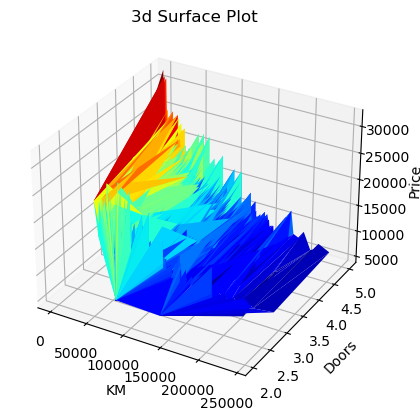

In [99]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap='jet')
ax.set_title('3d Surface Plot')
ax.set_xlabel('KM')
ax.set_ylabel('Doors')
ax.set_zlabel('Price')
plt.show()

<hr>

# Contour Plot

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('./ToyotaCorolla.csv')
x=df['KM']
y=df['Weight']
z=df['Price']

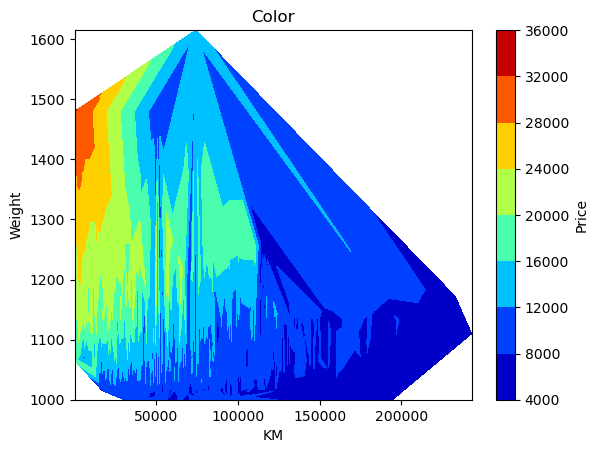

In [102]:
plt.tricontourf(x,y,z, cmap='jet')
plt.colorbar(label='Price')
plt.xlabel('KM')
plt.ylabel('Weight')
plt.title('Color')
plt.show()

<hr>

# HeatMap

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('./ToyotaCorolla.csv')

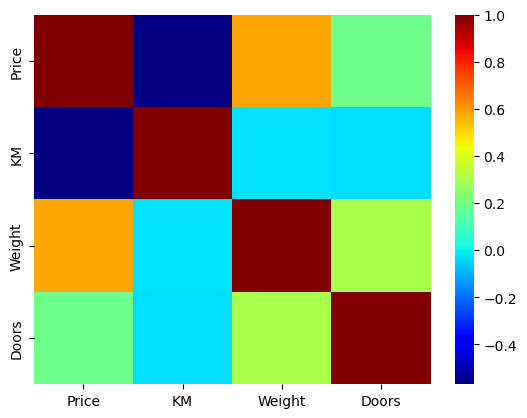

In [105]:
sns.heatmap(df[['Price','KM','Weight','Doors']].corr(),cmap='jet')
plt.show()

<hr>

# BoxPlot

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('./ToyotaCorolla.csv')

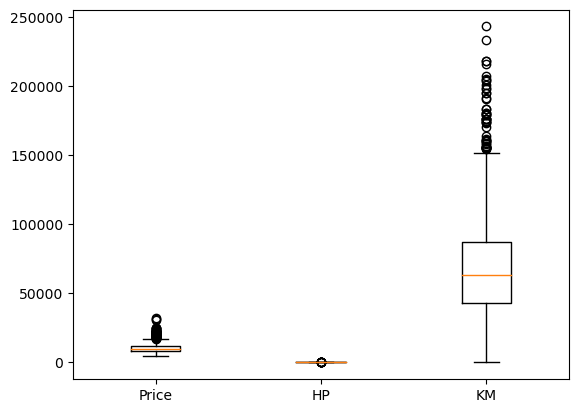

In [108]:
plt.boxplot(df[['Price','HP','KM']])
plt.xticks([1,2,3],['Price','HP','KM'])
plt.show()

<hr>

# Best First Search

In [109]:
graph = {
    'S':['A','B'],
    'A':['C','D'],
    'B':['E','F'],
    'C':[],
    'D':[],
    'E':['H'],
    'F':['I','G'],
    'H':[],
    'I':[],
    'G':[],
}

In [110]:
heuristics = {
    'S':13,
    'A':12,
    'B':4,
    'C':7,
    'D':3,
    'E':8,
    'F':2,
    'H':4,
    'I':9,
    'G':0,
}

In [111]:
from queue import PriorityQueue
def bfs(graph, heuristics,start,goal):
    visited = set()
    pq = PriorityQueue()
    pq.put((heuristics[start],start))
    while not pq.empty():
        _, node = pq.get()
        if node == goal:
            print("Visiting ",node)
            print('Done Goal Reached')
            return 
        for nei in graph[node]:
            if nei not in visited:
                pq.put((heuristics[nei],nei))
        visited.add(node)
        print('Visiting ',node)
    print('No Connection')
bfs(graph,heuristics,'S','G')

Visiting  S
Visiting  B
Visiting  F
Visiting  G
Done Goal Reached


<hr>

# A Star

In [112]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C', 'E'],
    'E': ['D']
}
heuristics={
    'A':4,
    'B':2,
    'C':3,
    'D':1,
    'E':0
}

In [113]:
class Node:
    def __init__(self,position, parent=None):
        self.position=position
        self.parent = parent
        self.h=0
        self.g=0
        self.f=0
from queue import PriorityQueue
def astar(graph, heuristics, start, goal):
    openlist = PriorityQueue()
    closedlist = set()
    start_node = Node(start) 
    openlist.put((start_node.f,start_node))
    while not openlist.empty():
        _, curr = openlist.get()
        closedlist.add(curr.position)
        if curr.position == goal:
            path = []
            while curr:
                path.append(curr.position)
                curr=curr.parent
            return path[::-1]
        for nei in graph[curr.position]:
            if nei in closedlist:
                continue
            nei_node = Node(nei,curr)
            nei_node.g=curr.g+1
            nei_node.h=heuristics[nei]
            nei_node.f=nei_node.g+nei_node.h
            # Add the neighbor to the open list if it's not already there or if it has a lower f value
            if nei_node not in [n[1] for n in openlist.queue]:
                openlist.put((nei_node.f, nei_node))
    return []
print(astar(graph,heuristics,'A','E'))

['A', 'B', 'D', 'E']


<hr>

# MinMax

In [114]:
def minimax(depth, nodeIndex, maxP, values):
    if depth == 3:
        return values[nodeIndex]
    if maxP:
        best = float('-inf')
        for i in range(2):
            val = minimax(depth+1, nodeIndex*2+i, False, values)
            best = max(best,val)
        return best
    else:
        best = float('inf')
        for i in range(2):
            val=minimax(depth+1,nodeIndex*2+i,True,values)
            best=min(best,val)
        return best
values = [3,5,2,9,12,5,23,23]
print(minimax(0,0,True,values))

12


<hr>

# Alpha-Beta

In [115]:
def minimax(depth, alpha, beta, nodeIndex, maxP, values):
    if depth == 3:
        return values[nodeIndex]
    if maxP:
        best = float('-inf')
        for i in range(2):
            val = minimax(depth+1, alpha, beta, nodeIndex*2+i, False, values)
            best = max(best,val)
            alpha = max(best, alpha)
            if beta<=alpha:
                break
            
        return best
    else:
        best = float('inf')
        for i in range(2):
            val = minimax(depth+1, alpha, beta, nodeIndex*2+i, True, values)
            best = min(best,val)
            beta = min(best, beta)
            if beta<=alpha:
                break
        return best
values = [3,5,2,9,12,5,23,23]
print(minimax(0,float('-inf'),float('inf'),0,True,values))

12


In [44]:
# Without using keras

import numpy as np

# Activation function (step function)
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Define the training data for the AND function
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

# Define the training data for the OR function
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([[0], [1], [1], [1]])

# Define the Single-layer Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        # Initialize weights to zero
        self.weights = np.zeros((input_size, 1))
        # Initialize bias to zero
        self.bias = 0
        # Set the learning rate and the number of training epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self, X, y):
        # Training process
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                # Reshape inputs to column vector
                inputs = inputs.reshape(-1, 1)
                # Calculate linear output
                linear_output = np.dot(inputs.T, self.weights) + self.bias
                # Apply step function to get the prediction
                prediction = step_function(linear_output)
                # Calculate the error
                error = label - prediction
                # Update weights and bias based on the error
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def predict(self, X):
        # Prediction process
        linear_output = np.dot(X, self.weights) + self.bias
        return step_function(linear_output)

# Training the Perceptron for AND function
perceptron_and = Perceptron(input_size=2)
perceptron_and.train(X_and, y_and)

# Training the Perceptron for OR function
perceptron_or = Perceptron(input_size=2)
perceptron_or.train(X_or, y_or)

# Print training results for the AND function
print("AND Function Predictions:")
print(perceptron_and.predict(X_and))

# Print training results for the OR function
print("\nOR Function Predictions:")
print(perceptron_or.predict(X_or))

# Manually test specific input values for the AND function
and_test_input = np.array([[1, 1]])
print("\nAND Function Prediction for input [1, 1]:")
print(perceptron_and.predict(and_test_input))

# Manually test specific input values for the OR function
or_test_input = np.array([[0, 1]])
print("\nOR Function Prediction for input [0, 1]:")
print(perceptron_or.predict(or_test_input))

AND Function Predictions:
[[0]
 [0]
 [0]
 [1]]

OR Function Predictions:
[[0]
 [1]
 [1]
 [1]]

AND Function Prediction for input [1, 1]:
[[1]]

OR Function Prediction for input [0, 1]:
[[1]]
